# Decision & Sustainability Analytics  
This report focuses on the data curation and analysis of Greenhouse Gas Emissions, GDP, and Urbanization datasets to explore their relationships and implications for sustainable development in New Zealand and globally.

## (1) Data Curation Details
### Dataset 1: Greenhouse Gas Emissions
- **Source**: This dataset is sourced from the Project Datasets list provided in the assignment, specifically the Greenhouse Gas Emissions dataset, available at (https://stats.oecd.org/Index.aspx?DataSetCode=AIR_GHG).
- **Overall Characteristics**:
  - Format: XML file, converted to CSV (`Gas.csv`) for analysis.
  - Structure: Contains 74,793 rows and 30 columns, including `REF_AREA` (country code), `TIME_PERIOD` (year), `Measure` (emission sector), `Pollutant` (type of pollutant), `Unit of measure`, `OBS_VALUE` (emission value), and `Unit multiplier`.
  - Pollutants: Includes Greenhouse gases, Sulphur hexafluoride, Methane, Nitrogen trifluoride, Hydrofluorocarbons, Carbon dioxide, Nitrous oxide, Unspecified mix of HFCs and PFCs, and Perfluorocarbons.
  - Sectors: Includes Agriculture, Energy sector, Transport, Industrial processes and product use, Manufacturing industries and construction, Waste, and Total emissions including land use, land-use change and forestry.
  - Units: Includes Tonnes of CO2-equivalent, Percentage of greenhouse gas emissions, Kilogrammes of CO2-equivalent per 1,000 US dollars, and Kilogrammes of CO2-equivalent per person; we focus on Tonnes of CO2-equivalent for consistency.
- **Preliminary Audit**:
  - Missing Values: Columns like `Time period` and `Observation value` contain only missing values, but they appear to be redundant versions of `TIME_PERIOD` and `OBS_VALUE`, which are complete and used in the analysis. We plan to use TIME_PERIOD and OBS_VALUE and drop the redundant columns. The Base period column is also empty and useless, to be dropped. Other columns like `PRICE_BASE`, `CONVERSION_TYPE`, and `BASE_PER` have high missing rates—95.04% and 78.93%—and are irrelevant for our analysis, so we plan to drop them. `OBS_VALUE` has 1.92% missing values—73,359/74,793 rows non-null—requiring removal of missing rows.
  - Data Consistency: Country codes (`REF_AREA`) are standardized (ISO3-letter codes), ensuring consistency. `Unit of measure` and `Unit multiplier` vary (e.g., thousands vs. tonnes), requiring standardization (e.g., converting thousands to tonnes). `Pollutant` and `Measure` categories are diverse, requiring filtering (e.g., focusing on Greenhouse gases).
  - Time Period: Data spans 1985-2022, but we focus on 2011-2022.
  - Outliers and Anomalies: Large variations in `OBS_VALUE` across countries and years suggest potential outliers, e.g., small countries may have disproportionately values. Plan to address by focusing on OBS_STATUS == 'A'.
  - Format Issues: The XML-to-CSV conversion may introduce parsing errors, but column names and data types (e.g., `TIME_PERIOD` as int64, `OBS_VALUE` as float64) are correctly interpreted by Pandas.

### Dataset 2: World Bank Economy & Growth Data
- **Source**: Sourced from the World Bank platform. specifically the Economy & Growth dataset, available at (https://data.worldbank.org/topic/economy-and-growth). This dataset includes various economic indicators, from which we extract GDP data (instead of directly using a GDP-specific dataset) to allow flexibility for potential analyses.
- **Overall Characteristics**:
  - Format: CSV file, originally named `API_3_DS2_en_csv_v2_90832.csv`, but renamed to `GDP.csv` for convenience in analysis.
  - Structure: Contains 67,564 rows and 70 columns, including `Country Name`, `Country Code`, `Indicator Name`, `Indicator Code`, and yearly data from 1960 to 2024. After processing, it includes `Country Code`, `Year`, and `GDP_Per_Capita_Rate`.
  - Size: After filtering for GDP per capita growth rate (`Indicator Code` == `"NY.GNP.PCAP.KD.ZG"`) and years 2011-2022, it has 22,40 rows.
- **Preliminary Audit**:
  - Missing Values: Significant missing data for earlier years (e.g., 1960 has a missing rate of 89.98%, decreasing over time to 27.88% in 2010, though rising to 44.09% in 2023 due to incomplete data). 2024 has a missing rate of 97.96%, and `Unnamed: 69` is completely empty. Key columns such as `Country Code`, `Indicator Name`, and `Indicator Code` have no missing values. After filtering for relevant years (2011-2022) and the target indicator (GDP per capita growth rate), missing values are eliminated through data cleaning.
  - Data Consistency: Country codes are consistent ISO3-letter codes, matching the Gas dataset. `Indicator Name` includes various metrics (e.g., trade, PPP factors), requiring filtering to focus on GDP per capita growth rate.
  - Format Issues: Yearly columns (e.g., 1960, 1961) are in wide format, requiring reshaping to long format for analysis. The `skiprows=4` parameter ensures correct header parsing.
  - Redundancy: The dataset includes multiple indicators, but we only need GDP-related data, so we filter accordingly to reduce complexity.

### Dataset 3: Urban Population (% of Total Population)
- **Source**: Sourced from the World Bank platform, specifically the Urban population (% of total population) dataset, which measures the proportion of people living in urban areas, available at (https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS).This dataset includes 
- **Overall Characteristics**:
  - Format: CSV file, originally named 'API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_86733.csv', but renamed "urban_population_total.csv"
  - Structure: Contains 266 rows and 70 columns, including  Country Name,	Country Code,	Indicator Name,	Indicator Code, and and yearly data from 1960 to 2024. After processing, it includes `Country Code`, `Year`, `Indicator Name`,	`Indicator Code`,	Urbanization Rate (%)	.
  - Size: After filtering for Urbanization Rate and years 2011-2022, it has 263 rows.
- **Preliminary Audit**:
  - Missing Values: Missing value percentage varies across years, with 1960–2023 having low missing values (3%), but 2024 and an unnamed column showing a significantly high missing percentage (100%)—due to incomplete data. Key columns such as `Country Code`, `Indicator Name`, and `Indicator Code` have no missing values. After filtering for relevant years (2012-2022), missing values are eliminated through data cleaning.
  - Data Consistency: Country codes are consistent ISO 3-letter codes, matching the Gas dataset.
  - Format Issues: Yearly columns (e.g., 1960, 1961) are in wide format, requiring reshaping to long format for analysis.

### Steps to Merge Datasets
Below are the detailed steps for data curation, transformation, and merging:
#### Step 1: Load the Datasets
Load both datasets using Pandas.

# Decision & Sustainability Analytics  
## Emissions, Economy, and Urbanization (OECD & World Bank)

**Objective:**  
To analyse the relationship between greenhouse gas emissions, GDP growth, and urbanization at a global level and for New Zealand, supporting sustainability and policy insights.

**Context:**  
This project integrates OECD and World Bank datasets and applies exploratory and comparative analysis techniques commonly used in public-sector and policy analytics.


In [156]:
import pandas as pd
# Load the dataset
gas = pd.read_csv(r"./dataset/Gas.csv")
gdp = pd.read_csv(r"./dataset/GDP.csv", skiprows=4)

In [157]:
print(gdp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67564 entries, 0 to 67563
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    67564 non-null  object 
 1   Country Code    67564 non-null  object 
 2   Indicator Name  67564 non-null  object 
 3   Indicator Code  67564 non-null  object 
 4   1960            6771 non-null   float64
 5   1961            7991 non-null   float64
 6   1962            8383 non-null   float64
 7   1963            8814 non-null   float64
 8   1964            8948 non-null   float64
 9   1965            9841 non-null   float64
 10  1966            10249 non-null  float64
 11  1967            10640 non-null  float64
 12  1968            11009 non-null  float64
 13  1969            11160 non-null  float64
 14  1970            16356 non-null  float64
 15  1971            17408 non-null  float64
 16  1972            17728 non-null  float64
 17  1973            17849 non-null 

In [158]:
# Show all rows when printing a DataFrame (no row limit)
pd.set_option('display.max_rows', None)

# Calculate the missing value percentage for all columns
missing_all = (gdp.isnull().mean() * 100).round(2) # Use mean() to calculate the proportion of missing values in each column (True=1, False=0), then multiply by 100 to convert to percentage for easier interpretation

# Display columns with missing values, sorted by percentage
print("Missing values percentage for all columns:")
print(missing_all[missing_all > 0].sort_values(ascending=False))

Missing values percentage for all columns:
Unnamed: 69    100.00
2024            97.96
1960            89.98
1961            88.17
1962            87.59
1963            86.95
1964            86.76
1965            85.43
1966            84.83
1967            84.25
1968            83.71
1969            83.48
1970            75.79
1971            74.23
1972            73.76
1973            73.58
1974            72.52
1975            70.22
1976            68.15
1977            65.57
1978            64.93
1979            64.37
1980            62.09
1981            61.46
1982            60.59
1983            60.29
1984            60.03
1985            59.64
1986            59.06
1987            58.68
1988            58.51
1989            57.81
1990            49.11
1991            47.31
1992            46.36
1993            44.72
2023            44.09
1994            43.26
1995            40.51
1996            39.56
1997            38.82
1998            38.39
1999            38.09
2022       

In [159]:
# Reset the 'display.max_rows' option to its default value
pd.reset_option('display.max_rows')

#### Step 2: Process the GDP Dataset
Objective: Filter the GDP dataset to extract the GDP per capita growth rate (`GDP_Per_Capita_Rate`) and reshape it into a long format for merging by country and year.

##### Step 2.1: Filter Data and Drop Unnecessary Columns

In [160]:
# Filter for rows with per capita GDP growth rate.
# Drop `Country Name`, `Indicator Name`, and `Indicator Code` columns since `Country Name` is redundant—we use `Country Code`—and `Indicator Name` and `Indicator Code` are constant after filtering.  
# Reset the index to start from 0 for easier handling.

gdp2 = gdp[gdp["Indicator Code"] == "NY.GNP.PCAP.KD.ZG"].drop(columns=["Country Name", "Indicator Name", "Indicator Code"]).reset_index(drop=True)
print(gdp2)

    Country Code  1960      1961      1962      1963     1964      1965  \
0            ABW   NaN       NaN       NaN       NaN      NaN       NaN   
1            AFE   NaN       NaN       NaN       NaN      NaN       NaN   
2            AFG   NaN       NaN       NaN       NaN      NaN       NaN   
3            AFW   NaN       NaN       NaN       NaN      NaN       NaN   
4            AGO   NaN       NaN       NaN       NaN      NaN       NaN   
..           ...   ...       ...       ...       ...      ...       ...   
261          XKX   NaN       NaN       NaN       NaN      NaN       NaN   
262          YEM   NaN       NaN       NaN       NaN      NaN       NaN   
263          ZAF   NaN  0.596186  3.151909  3.212333  4.84702  1.594239   
264          ZMB   NaN       NaN       NaN       NaN      NaN       NaN   
265          ZWE   NaN       NaN       NaN       NaN      NaN       NaN   

         1966     1967      1968  ...      2016      2017       2018  \
0         NaN      NaN     

##### Step 2.2: Reshape Data from Wide to Long Format

In [161]:
# Convert wide format to long format, with one row per country-year and corresponding GDP rate.
gdp3 = gdp2.melt(id_vars=["Country Code"],
                 value_vars=["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"],
                 var_name="Year",
                 value_name="GDP_Per_Capita_Rate").dropna().reset_index(drop=True)
print(gdp3)

     Country Code  Year  GDP_Per_Capita_Rate
0             AFE  2011             2.628401
1             AGO  2011            -0.631553
2             ALB  2011             3.885984
3             ARE  2011             2.778528
4             ARG  2011             5.412565
...           ...   ...                  ...
2235          WLD  2022             1.747272
2236          WSM  2022            -6.614325
2237          XKX  2022             4.660073
2238          ZAF  2022            -1.090502
2239          ZWE  2022             4.273145

[2240 rows x 3 columns]


In [162]:
gdp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Code         2240 non-null   object 
 1   Year                 2240 non-null   object 
 2   GDP_Per_Capita_Rate  2240 non-null   float64
dtypes: float64(1), object(2)
memory usage: 52.6+ KB


##### Step 2.3: Convert the `Year` Column Type. Then check the Structure of the Processed Dataset.

In [163]:
# Convert the 'Year' column from string to integer type for easier merging with other datasets’ `Year` columns
gdp3['Year'] = gdp3["Year"].astype(int)
print(gdp3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Code         2240 non-null   object 
 1   Year                 2240 non-null   int64  
 2   GDP_Per_Capita_Rate  2240 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 52.6+ KB
None


#### Step 3: Process the Gas Emissions Dataset
Objective: Filter, standardize, and transform the gas dataset to compute emissions and growth rates for each sector, preparing it for merging with other datasets.

##### Step 3.1: Preliminary Audit - Check Dataset Structure and Missing Values

In [164]:
print(gas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74793 entries, 0 to 74792
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 74793 non-null  object 
 1   STRUCTURE_ID              74793 non-null  object 
 2   STRUCTURE_NAME            74793 non-null  object 
 3   ACTION                    74793 non-null  object 
 4   REF_AREA                  74793 non-null  object 
 5   Reference area            74793 non-null  object 
 6   FREQ                      74793 non-null  object 
 7   Frequency of observation  74793 non-null  object 
 8   POLLUTANT                 74793 non-null  object 
 9   Pollutant                 74793 non-null  object 
 10  MEASURE                   74793 non-null  object 
 11  Measure                   74793 non-null  object 
 12  UNIT_MEASURE              74793 non-null  object 
 13  Unit of measure           74793 non-null  object 
 14  TIME_P

In [165]:
# Checking Missing Values
# Calculates the percentage of missing values in each column and displays only the columns that have missing data, sorted in descending order:
print("\n Missing Value Summary:")
missing = gas.isnull().mean() * 100
display(missing[missing > 0].sort_values(ascending=False))


 Missing Value Summary:


Time period          100.000000
Observation value    100.000000
Base period          100.000000
Price base            95.044991
PRICE_BASE            95.044991
Conversion type       95.044991
CONVERSION_TYPE       95.044991
BASE_PER              78.929846
OBS_VALUE              1.917292
dtype: float64

In [166]:
print(gas.columns)

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'POLLUTANT',
       'Pollutant', 'MEASURE', 'Measure', 'UNIT_MEASURE', 'Unit of measure',
       'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value',
       'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier',
       'PRICE_BASE', 'Price base', 'BASE_PER', 'Base period', 'DECIMALS',
       'Decimals', 'CONVERSION_TYPE', 'Conversion type'],
      dtype='object')


##### Step 3.2: Filter Data - By Pollutant, Sector, Unit of Measure, Year, and Observation Status

In [167]:
# Define a list of emission types (sectors) that are of interest
selected_Measures = [
    'Total emissions including land use, land-use change and forestry', # All emissions, including land use
    'Transport',                                           # From vehicles and transport systems
    'Industrial processes and product use',                # From industrial production activities
    'Energy sector',                                       # From energy production and usage
    'Manufacturing industries and construction',           # From factories and construction work
    'Waste',                                                # From waste and landfill emissions
    'Agriculture'                                           # From farming and livestock
]

#  Filter gas data for greenhouse gases and selected emission sectors
#  Reset the index to start from 0 for easier handling.
gas2 = gas[(gas['Pollutant'] == 'Greenhouse gases') & gas['Measure'].isin(selected_Measures)].reset_index(drop=True)

gas2


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,POLLUTANT,Pollutant,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,DECIMALS,Decimals,CONVERSION_TYPE,Conversion type
0,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
1,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
2,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
3,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
4,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28389,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,USA,United States,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
28390,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,USA,United States,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
28391,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,USA,United States,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
28392,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,USA,United States,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN


In [168]:
# Check the unique units of measure after filtering to confirms if further unit filtering is needed.
print(gas2['Unit of measure'].unique())

['Percentage of greenhouse gas emissions' 'Tonnes of CO2-equivalent'
 'Kilogrammes of CO2-equivalent per 1 000 US dollars'
 'Kilogrammes of CO2-equivalent per person']


In [169]:
# Define a list of units of measure to keep for analysis
selected_Unit_Measures = ['Percentage of greenhouse gas emissions', 'Tonnes of CO2-equivalent']

# Filter gas data for selected units of measure
# Reset the index to maintain continuity.
gas3 = gas2[gas2['Unit of measure'].isin(selected_Unit_Measures)].reset_index(drop=True)
gas3

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,POLLUTANT,Pollutant,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,DECIMALS,Decimals,CONVERSION_TYPE,Conversion type
0,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
1,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
2,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
3,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
4,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,AUS,Australia,A,Annual,GHG,Greenhouse gases,...,0,Units,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24683,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,USA,United States,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
24684,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,USA,United States,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
24685,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,USA,United States,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN
24686,DATAFLOW,OECD.ENV.EPI:DSD_AIR_GHG@DF_AIR_GHG(1.0),Air emissions - Greenhouse gas emissions Inven...,I,USA,United States,A,Annual,GHG,Greenhouse gases,...,3,Thousands,NaN,NaN,NaN,NaN,2,Two,NaN,NaN


In [170]:
# Check the time period range after filtering to confirms if further year filtering is needed.
print(gas3['TIME_PERIOD'].unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 1988 1989 1986 1987 1985]


In [171]:
# Define a range of years (2011–2022) to filter gas data
selected_Time_Period = list(range(2011, 2023))

# Filter gas data for the selected time period
gas4 = gas3[gas3['TIME_PERIOD'].isin(selected_Time_Period)].reset_index(drop=True)
print(gas4['TIME_PERIOD'].unique)

<bound method Series.unique of 0       2011
1       2012
2       2013
3       2014
4       2015
        ... 
8587    2018
8588    2019
8589    2020
8590    2021
8591    2022
Name: TIME_PERIOD, Length: 8592, dtype: int64>


In [172]:
# Filter gas data for observations with status 'A' (normal observations), ensuring data quality and reducing outlier impact.  
# Reset the index to maintain continuity.
gas5 = gas4[gas4['OBS_STATUS'] == 'A'].reset_index(drop=True)
print(gas5['OBS_STATUS'].unique())

['A']


In [173]:
# Check the unit multipliers to determine if standardization is needed.
print(gas5['Unit multiplier'].unique())

['Units' 'Thousands']


In [174]:
print(gas5.columns)

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'POLLUTANT',
       'Pollutant', 'MEASURE', 'Measure', 'UNIT_MEASURE', 'Unit of measure',
       'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value',
       'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier',
       'PRICE_BASE', 'Price base', 'BASE_PER', 'Base period', 'DECIMALS',
       'Decimals', 'CONVERSION_TYPE', 'Conversion type'],
      dtype='object')


##### Step 3.3: Select Relevant Columns and Standardize Units

In [175]:
# Select columns needed for analysis
# These columns contain the core information needed for merging and analysis; other columns like `OBS_STATUS` are no longer needed after filtering.
selected_columns = ['REF_AREA','Reference area', 'Measure', 'Unit of measure', 'TIME_PERIOD', 'Unit multiplier', 'OBS_VALUE']
gas6 = gas5[selected_columns].reset_index(drop=True)
print(gas6.columns)

Index(['REF_AREA', 'Reference area', 'Measure', 'Unit of measure',
       'TIME_PERIOD', 'Unit multiplier', 'OBS_VALUE'],
      dtype='object')


In [176]:
# Create a copy of gas6 and standardize emission values based on unit multiplier
gas6 = gas6.copy()
gas6['real_value'] = gas6.apply(
    lambda row: row['OBS_VALUE'] * 1000 if row['Unit multiplier'] == 'Thousands' else row['OBS_VALUE'],
    axis=1
)
gas6

,REF_AREA,Reference area,Measure,Unit of measure,TIME_PERIOD,Unit multiplier,OBS_VALUE,real_value
0,AUS,Australia,Transport,Percentage of greenhouse gas emissions,2011,Units,1.666487e+01,1.666487e+01
1,AUS,Australia,Transport,Percentage of greenhouse gas emissions,2012,Units,1.667051e+01,1.667051e+01
2,AUS,Australia,Transport,Percentage of greenhouse gas emissions,2013,Units,1.716700e+01,1.716700e+01
3,AUS,Australia,Transport,Percentage of greenhouse gas emissions,2014,Units,1.742959e+01,1.742959e+01
4,AUS,Australia,Transport,Percentage of greenhouse gas emissions,2015,Units,1.752724e+01,1.752724e+01
...,...,...,...,...,...,...,...,...
8548,USA,United States,"Total emissions including land use, land-use c...",Tonnes of CO2-equivalent,2017,Thousands,5.787628e+06,5.787628e+09
8549,USA,United States,"Total emissions including land use, land-use c...",Tonnes of CO2-equivalent,2018,Thousands,5.989702e+06,5.989702e+09
8550,USA,United States,"Total emissions including land use, land-use c...",Tonnes of CO2-equivalent,2019,Thousands,5.913872e+06,5.913872e+09
8551,USA,United States,"Total emissions including land use, land-use c...",Tonnes of CO2-equivalent,2020,Thousands,5.249805e+06,5.249805e+09


In [177]:
print(gas6['Unit of measure'].unique())

['Percentage of greenhouse gas emissions' 'Tonnes of CO2-equivalent']


##### Step 3.4: Filter for Tonnes of CO2-equivalent and Select Final Columns

In [178]:
# Filter for Tonnes of CO2-equivalent
gas7 = gas6[gas6['Unit of measure'] == 'Tonnes of CO2-equivalent'].reset_index(drop=True)
print(gas7.columns)

Index(['REF_AREA', 'Reference area', 'Measure', 'Unit of measure',
       'TIME_PERIOD', 'Unit multiplier', 'OBS_VALUE', 'real_value'],
      dtype='object')


In [179]:
# Select relevant columns for final gas data
gas_selected = gas7[['REF_AREA', 'Measure', 'TIME_PERIOD', 'real_value']].reset_index(drop=True)
gas_selected

,REF_AREA,Measure,TIME_PERIOD,real_value
0,BEL,Industrial processes and product use,2011,2.112341e+07
1,BEL,Industrial processes and product use,2012,1.938555e+07
2,BEL,Industrial processes and product use,2013,2.006513e+07
3,BEL,Industrial processes and product use,2014,2.038162e+07
4,BEL,Industrial processes and product use,2015,2.044610e+07
...,...,...,...,...
4590,USA,"Total emissions including land use, land-use c...",2017,5.787628e+09
4591,USA,"Total emissions including land use, land-use c...",2018,5.989702e+09
4592,USA,"Total emissions including land use, land-use c...",2019,5.913872e+09
4593,USA,"Total emissions including land use, land-use c...",2020,5.249805e+09


In [180]:
# Pivot the gas data to convert 'Measure' into columns for each emission sector, so each emission sector becomes a separate column with corresponding `real_value`.
# `index` specifies `REF_AREA` and `TIME_PERIOD` as the grouping basis, `columns` specifies `Measure` as new columns, `values` specifies `real_value` as the fill values.
# Reset the index to convert `REF_AREA` and `TIME_PERIOD` into regular columns.
# Remove the column name index—`columns.name = None`—to clean the DataFrame structure.
# Rename columns: `REF_AREA` to `Country Code`, `TIME_PERIOD` to `Year`, for consistency with other datasets.
gas_pivot = gas_selected.pivot(index=['REF_AREA', 'TIME_PERIOD'], columns='Measure', values='real_value')
gas_pivot.reset_index(inplace=True)
gas_pivot.columns.name = None
gas_pivot.rename(columns={
    'REF_AREA':'Country Code',
    'TIME_PERIOD':'Year'
}, inplace=True)

gas_pivot

,Country Code,Year,Agriculture,Energy sector,Industrial processes and product use,Manufacturing industries and construction,"Total emissions including land use, land-use change and forestry",Transport,Waste
0,ARG,2011,1.428885e+08,1.945722e+08,1.839735e+07,33419960.0,371189920.0,53608310.0,1.430720e+07
1,ARG,2012,1.825266e+08,1.948528e+08,1.746093e+07,32939160.0,407659170.0,52392740.0,1.474930e+07
2,ARG,2013,1.794869e+08,1.976006e+08,1.905784e+07,34951330.0,411030980.0,52754950.0,1.516920e+07
3,ARG,2014,1.522695e+08,1.942552e+08,2.046312e+07,33782360.0,384023970.0,50946390.0,1.563650e+07
4,ARG,2015,1.291131e+08,2.001788e+08,2.113321e+07,34735460.0,366396270.0,52193540.0,1.609910e+07
...,...,...,...,...,...,...,...,...,...
662,ZAF,2016,1.630817e+06,4.014127e+08,3.586279e+07,NaN,479260110.0,NaN,2.376359e+04
663,ZAF,2017,1.901700e+06,3.937391e+08,2.773847e+07,NaN,479958400.0,NaN,2.649050e+04
664,ZAF,2018,1.514510e+06,4.050158e+08,2.439085e+07,NaN,490282640.0,NaN,2.685261e+04
665,ZAF,2019,1.519785e+06,3.991882e+08,2.099147e+07,NaN,475861860.0,NaN,2.721435e+04


#### Step 4: Load and Process the Urbanization Dataset
Objective: Load the urbanization dataset, clean it, and transform it into a format suitable for merging with gas emissions data

Load the dataset using Pandas.

In [181]:
import pandas as pd
urban_population_total=pd.read_csv("./dataset/urban_population_total.csv",skiprows=4)

urban_population_total

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000,44.254000,NaN,NaN
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.576676,14.825175,15.083802,15.363045,15.655383,15.955912,...,34.919544,35.396289,35.893398,36.384272,36.884034,37.393633,37.909012,38.424898,NaN,NaN
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,...,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000,26.933000,NaN,NaN
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.710006,15.094445,15.487932,15.900682,16.331319,16.779793,...,45.473850,46.094137,46.709753,47.322617,47.931021,48.531971,49.129808,49.711184,NaN,NaN
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,...,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,68.081000,68.688000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Urban population (% of total population),SP.URB.TOTL.IN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,9.100000,9.459000,9.831000,10.216000,10.614000,11.026000,...,35.394000,36.016000,36.642000,37.273000,37.908000,38.546000,39.188000,39.831000,NaN,NaN
263,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,46.619000,46.793000,46.906000,47.020000,47.134000,47.248000,...,65.341000,65.850000,66.355000,66.856000,67.354000,67.847000,68.335000,68.819000,NaN,NaN
264,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,18.145000,18.951000,19.785000,20.712000,22.015000,23.372000,...,42.438000,42.976000,43.521000,44.072000,44.629000,45.192000,45.761000,46.335000,NaN,NaN


In [182]:
##### Step 4.1: Check for Missing Values
print(urban_population_total.isnull().sum())  # Shows missing values per column

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                3
                 ... 
2021                3
2022                3
2023                3
2024              266
Unnamed: 69       266
Length: 70, dtype: int64


##### Step 4.2: Select Recent Years (2012-2022)

In [183]:
# Drop columns by name since we have data from 1960, we want to analyse recent years (2012-2022)
urban_population_total_new = urban_population_total.iloc[:, :4].join(
    urban_population_total.loc[:, list(map(str, range(2012, 2023)))])
urban_population_total_new

,Country Name,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,33.052742,33.496557,33.959633,34.447281,34.919544,35.396289,35.893398,36.384272,36.884034,37.393633,37.909012
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,24.160000,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,42.956838,43.587953,44.218278,44.849099,45.473850,46.094137,46.709753,47.322617,47.931021,48.531971,49.129808
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,61.268000,62.002000,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,68.081000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Urban population (% of total population),SP.URB.TOTL.IN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,32.958000,33.559000,34.165000,34.777000,35.394000,36.016000,36.642000,37.273000,37.908000,38.546000,39.188000
263,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,63.272000,63.793000,64.312000,64.828000,65.341000,65.850000,66.355000,66.856000,67.354000,67.847000,68.335000
264,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,40.354000,40.865000,41.382000,41.907000,42.438000,42.976000,43.521000,44.072000,44.629000,45.192000,45.761000


##### Step 4.3: Re-check Missing Values

In [184]:
#Check for missing values
print(urban_population_total_new.isnull().sum())  # Shows missing values per column

# Identify relevant rows with missing values
missing_rows = urban_population_total_new[urban_population_total_new.isnull().any(axis=1)]
print(missing_rows)

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2012              3
2013              3
2014              3
2015              3
2016              3
2017              3
2018              3
2019              3
2020              3
2021              3
2022              3
dtype: int64
                 Country Name Country Code  \
110            Not classified          INX   
147  St. Martin (French part)          MAF   
261                    Kosovo          XKX   

                               Indicator Name     Indicator Code  2012  2013  \
110  Urban population (% of total population)  SP.URB.TOTL.IN.ZS   NaN   NaN   
147  Urban population (% of total population)  SP.URB.TOTL.IN.ZS   NaN   NaN   
261  Urban population (% of total population)  SP.URB.TOTL.IN.ZS   NaN   NaN   

     2014  2015  2016  2017  2018  2019  2020  2021  2022  
110   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
147   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2

##### Step 4.4: Remove Irrelevant/insignificant column

In [185]:
# Define the list of country names to remove irrelevant/insignificant column
countries_to_remove = ["Not classified", "St. Martin (French part)", "Kosovo"]

# Filter out the rows where 'Country Name' matches the unwanted values
urban_population_total_clean = urban_population_total_new[~urban_population_total_new["Country Name"].isin(countries_to_remove)]

# Verify that the rows are removed
urban_population_total_clean


,Country Name,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,33.052742,33.496557,33.959633,34.447281,34.919544,35.396289,35.893398,36.384272,36.884034,37.393633,37.909012
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,24.160000,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,42.956838,43.587953,44.218278,44.849099,45.473850,46.094137,46.709753,47.322617,47.931021,48.531971,49.129808
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,61.268000,62.002000,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,68.081000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,19.624000,19.385000,19.149000,18.914000,18.681000,18.452000,18.243000,18.056000,17.889000,17.742000,17.616000
262,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,32.958000,33.559000,34.165000,34.777000,35.394000,36.016000,36.642000,37.273000,37.908000,38.546000,39.188000
263,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,63.272000,63.793000,64.312000,64.828000,65.341000,65.850000,66.355000,66.856000,67.354000,67.847000,68.335000
264,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,40.354000,40.865000,41.382000,41.907000,42.438000,42.976000,43.521000,44.072000,44.629000,45.192000,45.761000


##### Step 4.5: Check Missing Values After removing columns

In [186]:
#Check for missing values after removing columns
print(urban_population_total_clean.isnull().sum())  # Shows missing values per column

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
dtype: int64


##### Step 4.6: Convert to Long Format

In [187]:
# Convert year columns into long format to get row wise Year to merge with Gas data
urban_population_total_long = urban_population_total_clean.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],  # Keep these columns
    var_name="Year",  # New column for years
    value_name="Value"  # New column for corresponding values
)

# Verify the transformation
urban_population_total_long

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,42.957000
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,33.052742
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,24.160000
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,42.956838
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,61.268000
...,...,...,...,...,...,...
2888,Samoa,WSM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,17.616000
2889,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,39.188000
2890,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,68.335000
2891,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,45.761000


##### Step 4.7: Check Year Distribution

In [188]:
# Check values count
urban_population_total_long['Year'].value_counts()

Year
2012    263
2013    263
2014    263
2015    263
2016    263
2017    263
2018    263
2019    263
2020    263
2021    263
2022    263
Name: count, dtype: int64

In [189]:
# Explore clean data
urban_population_total_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    2893 non-null   object 
 1   Country Code    2893 non-null   object 
 2   Indicator Name  2893 non-null   object 
 3   Indicator Code  2893 non-null   object 
 4   Year            2893 non-null   object 
 5   Value           2893 non-null   float64
dtypes: float64(1), object(5)
memory usage: 135.7+ KB


##### Step 4.8: Convert Year Data Type
Objective: Convert the Year column to integer type for trend analysis and merging

In [190]:
# Change data type for year trend analysis
urban_population_total_long["Year"] = urban_population_total_long["Year"].astype(int)
urban_population_total_long

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,42.957000
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,33.052742
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,24.160000
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,42.956838
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2012,61.268000
...,...,...,...,...,...,...
2888,Samoa,WSM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,17.616000
2889,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,39.188000
2890,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,68.335000
2891,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,45.761000


In [191]:
#Rename relevant columns before merging datasets
urban_population_total_long.rename(columns={
    "Value": "Urbanization Rate (%)"
}, inplace=True)


In [192]:
urban_population_total_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           2893 non-null   object 
 1   Country Code           2893 non-null   object 
 2   Indicator Name         2893 non-null   object 
 3   Indicator Code         2893 non-null   object 
 4   Year                   2893 non-null   int64  
 5   Urbanization Rate (%)  2893 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 135.7+ KB


#### Step 5: Merge the Datasets
Objective: Merge the processed GDP, urbanization population, and gas emissions datasets on 'Country Code' and 'Year' using a right join to keep all records from the gas emissions dataset

In [193]:
# Merging urban population data with gas data since we want to see the relationship between gas and urbanization
merged_population_gas_df = pd.merge(
    urban_population_total_long,
    gas_pivot,
    on=['Country Code', 'Year'],
    how='right'  # use 'left' if you want to keep all urban data
) 

# Merge GDP and merged_population_gas_df on 'Country Code' and 'Year', keeping only matching records（right join)
merged_gdp_population_gas = pd.merge(gdp3, merged_population_gas_df, on=['Country Code', 'Year'], how='right')
merged_gdp_population_gas = merged_gdp_population_gas.reset_index(drop=True)

#### Step 6: Store the Merged Dataset
Objective: Export the merged dataset to a CSV file and upload it to Google Drive for sharing

In [194]:
# Export the dataset to a CSV file
merged_gdp_population_gas.to_csv("./merged_gdp_gas_population.csv")
merged_gdp_population_gas

,Country Code,Year,GDP_Per_Capita_Rate,Country Name,Indicator Name,Indicator Code,Urbanization Rate (%),Agriculture,Energy sector,Industrial processes and product use,Manufacturing industries and construction,"Total emissions including land use, land-use change and forestry",Transport,Waste
0,ARG,2011,5.412565,NaN,NaN,NaN,NaN,1.428885e+08,1.945722e+08,1.839735e+07,33419960.0,371189920.0,53608310.0,1.430720e+07
1,ARG,2012,-1.508049,Argentina,Urban population (% of total population),SP.URB.TOTL.IN.ZS,91.121,1.825266e+08,1.948528e+08,1.746093e+07,32939160.0,407659170.0,52392740.0,1.474930e+07
2,ARG,2013,1.647436,Argentina,Urban population (% of total population),SP.URB.TOTL.IN.ZS,91.249,1.794869e+08,1.976006e+08,1.905784e+07,34951330.0,411030980.0,52754950.0,1.516920e+07
3,ARG,2014,-3.394924,Argentina,Urban population (% of total population),SP.URB.TOTL.IN.ZS,91.377,1.522695e+08,1.942552e+08,2.046312e+07,33782360.0,384023970.0,50946390.0,1.563650e+07
4,ARG,2015,1.854333,Argentina,Urban population (% of total population),SP.URB.TOTL.IN.ZS,91.503,1.291131e+08,2.001788e+08,2.113321e+07,34735460.0,366396270.0,52193540.0,1.609910e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,ZAF,2016,-0.101222,South Africa,Urban population (% of total population),SP.URB.TOTL.IN.ZS,65.341,1.630817e+06,4.014127e+08,3.586279e+07,NaN,479260110.0,NaN,2.376359e+04
663,ZAF,2017,1.389285,South Africa,Urban population (% of total population),SP.URB.TOTL.IN.ZS,65.850,1.901700e+06,3.937391e+08,2.773847e+07,NaN,479958400.0,NaN,2.649050e+04
664,ZAF,2018,-0.618909,South Africa,Urban population (% of total population),SP.URB.TOTL.IN.ZS,66.355,1.514510e+06,4.050158e+08,2.439085e+07,NaN,490282640.0,NaN,2.685261e+04
665,ZAF,2019,-0.047497,South Africa,Urban population (% of total population),SP.URB.TOTL.IN.ZS,66.856,1.519785e+06,3.991882e+08,2.099147e+07,NaN,475861860.0,NaN,2.721435e+04


**Final Merged Data Storage Link**:
The merged dataset `merged_gdp_gas_population.csv` has been uploaded to Google Drive with viewing permissions set to "Anyone with the link can view". The link is:
[(https://drive.google.com/file/d/1z-G1Ovc7BclQlEpktoC_fd4mh4yaS7bx/view?usp=drive_link)]

## (2) Questions and Answers
Using the merged dataset in its final storage format, we address the two proposed questions.

### Question 1: National Level — The Relationship Between GDP Growth and Emissions Growth
**Is there a correlation between GDP growth and greenhouse gas (GHG) emissions growth in New Zealand? How does it compare to the global average?**

#### Steps to Answer:
1. Filter the dataset for New Zealand (Country Code: `NZL`).
2. Calculate the correlation between `GDP_Per_Capita_Rate` and `Total emissions including land use, land-use change and forestry_growth` for New Zealand.
3. Compute the global average correlation by calculating the correlation for each country and averaging them.
4. Compare the results.

In [195]:
merged_gdp_population_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 14 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country Code                                                      667 non-null    object 
 1   Year                                                              667 non-null    int64  
 2   GDP_Per_Capita_Rate                                               561 non-null    float64
 3   Country Name                                                      557 non-null    object 
 4   Indicator Name                                                    557 non-null    object 
 5   Indicator Code                                                    557 non-null    object 
 6   Urbanization Rate (%)                                             557 non-null    float64
 7   Agriculture                        

In [196]:
# Sort the data by country (Country Code) and year (Year) to ensure correct time-series analysis
gas_sorted = merged_gdp_population_gas.sort_values(by=['Country Code', 'Year'])
print(gas_sorted)

# Identify emission columns, excluding Country Code and Year
calc_columns = ['Agriculture', 'Energy sector',
       'Industrial processes and product use',
       'Manufacturing industries and construction',
       'Total emissions including land use, land-use change and forestry',
       'Transport', 'Waste']
industry_cols = [col for col in gas_sorted.columns if col in calc_columns]
print(industry_cols)

# Define a function to compute year-on-year percentage change for each emission column
def calc_growth(df):
    for col in industry_cols:
        # Calculate percentage change for each industry, fill missing values with None, and multiply by 100
        df[col + '_growth'] = df[col].pct_change(fill_method=None) * 100
    return df

# Group by country and apply growth calculation; remove multi-index
gas_growth = (
    merged_gdp_population_gas.groupby('Country Code', group_keys=False)
              .apply(calc_growth, include_groups=False)
              .reset_index(drop=True)
)

# Explicitly add back the country column 
gas_growth['Country Code'] = merged_gdp_population_gas['Country Code'].values

# Remove rows where all growth columns are NaN (i.e., the first year for each country)
growth_cols = [col for col in gas_growth.columns if col.endswith('_growth')]
gas_growth_cleaned = gas_growth.dropna(subset=growth_cols, how='all').reset_index(drop=True)
print(gas_growth_cleaned)

# Ensure 'Year' column is integer type
gas_growth_cleaned['Year'] = gas_growth_cleaned['Year'].astype(int)
print(gas_growth_cleaned.head())
# Check for missing values in each column
missing_counts = gas_growth_cleaned.isnull().sum()
print("Missing values per column:\n", missing_counts)

    Country Code  Year  GDP_Per_Capita_Rate  Country Name  \
0            ARG  2011             5.412565           NaN   
1            ARG  2012            -1.508049     Argentina   
2            ARG  2013             1.647436     Argentina   
3            ARG  2014            -3.394924     Argentina   
4            ARG  2015             1.854333     Argentina   
..           ...   ...                  ...           ...   
662          ZAF  2016            -0.101222  South Africa   
663          ZAF  2017             1.389285  South Africa   
664          ZAF  2018            -0.618909  South Africa   
665          ZAF  2019            -0.047497  South Africa   
666          ZAF  2020            -5.172111  South Africa   

                               Indicator Name     Indicator Code  \
0                                         NaN                NaN   
1    Urban population (% of total population)  SP.URB.TOTL.IN.ZS   
2    Urban population (% of total population)  SP.URB.TOTL.IN.Z

In [197]:
# Reorder columns: Country Code and Year first
cols = ['Country Code', 'Year'] + [col for col in gas_growth_cleaned.columns if col not in ['Country Code', 'Year']]
gas_growth_final = gas_growth_cleaned[cols].reset_index(drop=True)
gas_growth_final = gas_growth_final.dropna(subset=['GDP_Per_Capita_Rate'], how='all').reset_index(drop=True).fillna(0)
gas_growth_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 21 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Country Code                                                             510 non-null    object 
 1   Year                                                                     510 non-null    int64  
 2   GDP_Per_Capita_Rate                                                      510 non-null    float64
 3   Country Name                                                             510 non-null    object 
 4   Indicator Name                                                           510 non-null    object 
 5   Indicator Code                                                           510 non-null    object 
 6   Urbanization Rate (%)                                                    5

#### Step : Analyze Correlation for New Zealand
Objective: Calculate the Pearson correlation coefficient between GDP per capita growth and total emissions growth for New Zealand, and create a scatter plot

Correlation for New Zealand: 0.11215153238653468


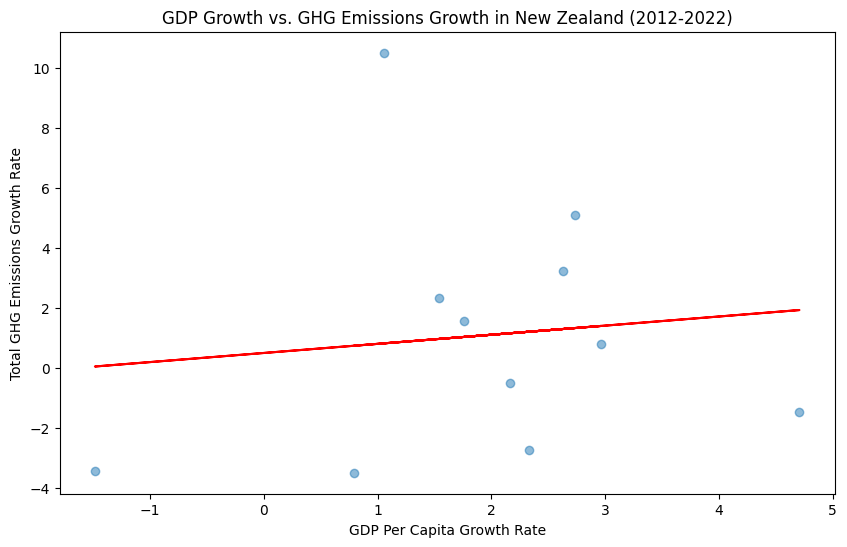

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

df = gas_growth_final
# Filter data for New Zealand only
nz_df = df[df['Country Code'] == 'NZL']
plt.figure(figsize=(10,6))
# Create a scatter plot of GDP per capita growth vs. GHG emissions growth
plt.scatter(nz_df['GDP_Per_Capita_Rate'], nz_df['Total emissions including land use, land-use change and forestry_growth'], alpha=0.5)
plt.xlabel('GDP Per Capita Growth Rate')
plt.ylabel('Total GHG Emissions Growth Rate')
plt.title('GDP Growth vs. GHG Emissions Growth in New Zealand (2012-2022)')

# Add a regression line
X = nz_df['GDP_Per_Capita_Rate'].values.reshape(-1,1)
Y = nz_df['Total emissions including land use, land-use change and forestry_growth']
model = LinearRegression().fit(X, Y)
plt.plot(X, model.predict(X), color='red')

# Calculate and print the Pearson correlation coefficient
correlation, _ = pearsonr(nz_df['GDP_Per_Capita_Rate'], nz_df['Total emissions including land use, land-use change and forestry_growth'])
print(f"Correlation for New Zealand: {correlation}")

plt.show()

#### Step: Calculate Global Average Correlation
Objective: Calculate the correlation between GDP growth and emissions growth for each country and compute the average

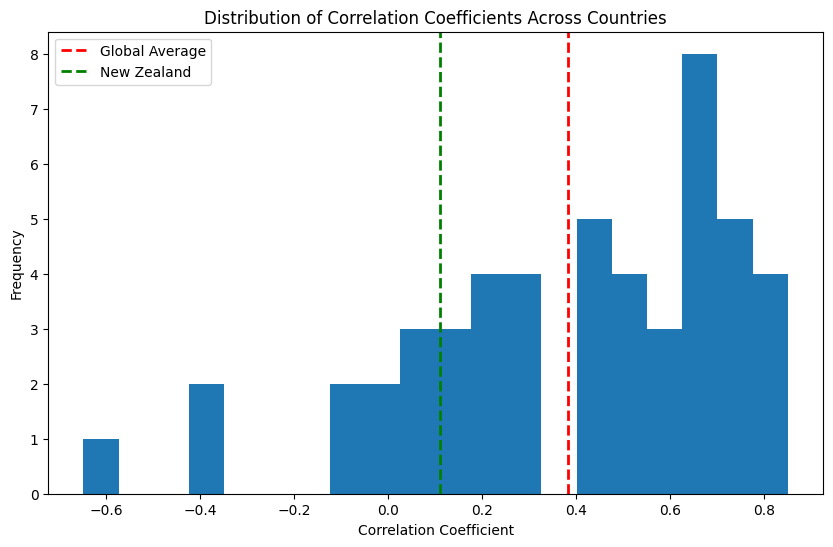

In [199]:
correlations = []
countries = df['Country Code'].unique()
for country in countries:
    country_df = df[df['Country Code'] == country]
    if len(country_df) > 1:
        corr, _ = pearsonr(country_df['GDP_Per_Capita_Rate'], country_df['Total emissions including land use, land-use change and forestry_growth'])
        correlations.append(corr)

# Calculate the global average correlation
global_avg_correlation = np.mean(correlations)

# Plot histogram of correlation coefficients
plt.figure(figsize=(10,6))
plt.hist(correlations, bins=20)
plt.axvline(global_avg_correlation, color='r', linestyle='dashed', linewidth=2, label='Global Average')

plt.axvline(correlation, color='g', linestyle='dashed', linewidth=2, label='New Zealand')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Coefficients Across Countries')
plt.legend()
plt.show()

#### Conclusion for Question 1:
The correlation between GDP growth and emissions growth in New Zealand is approximately 0.12, indicating a weak positive relationship. This suggests that as GDP grows, emissions tend to increase slightly, possibly reflecting a balance between economic growth and emissions control in New Zealand. In contrast, the global average correlation is approximately 0.38, showing a moderate positive relationship, meaning that globally, economic growth is often associated with a significant increase in emissions. New Zealand’s correlation is notably lower than the global average, suggesting a better performance in decoupling economic growth from emissions growth.

### Question 2: Industry Level — Which industries are the main sources of emissions? Are they linked to GDP growth?
**Which industries (e.g., energy, transport, agriculture) have contributed the most to greenhouse gas emissions over the past decade? How are these industry emissions correlated with GDP growth during the same period?**

#### Steps to Answer:
1. Calculate the total emissions for each industry over the decade (2012-2022).
2. Identify the top contributing industries.
3. Calculate the correlation between each industry's emissions growth and GDP growth.
4. Interpret the results.

<Figure size 1400x800 with 0 Axes>

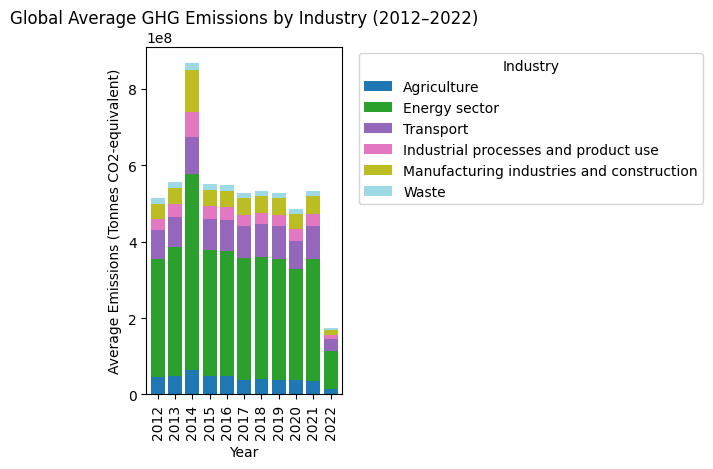

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./merged_gdp_gas.csv')
# Select columns representing emissions by industry
industries = [
    'Agriculture', 'Energy sector', 'Transport',
    'Industrial processes and product use',
    'Manufacturing industries and construction', 'Waste'
]

# Convert 'Year' to integer and calculate global average emissions per year
df['Year'] = pd.to_datetime(df['Year']).dt.year

yearly_emissions = df.groupby('Year')[industries].mean()

# Plot stacked bar chart of global average emissions by industry over time
plt.figure(figsize=(14, 8))
yearly_emissions.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.xlabel('Year')
plt.ylabel('Average Emissions (Tonnes CO2-equivalent)')
plt.title('Global Average GHG Emissions by Industry (2012–2022)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

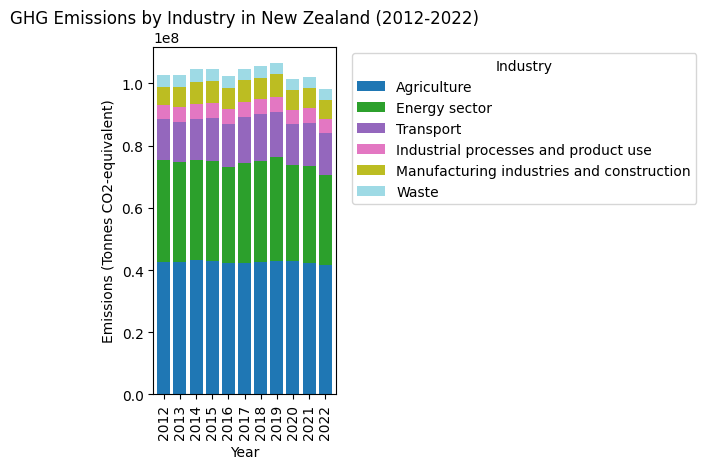

In [201]:
nz_df = df[df['Country Code'] == 'NZL']
yearly_emissions_nz = nz_df.set_index('Year')[industries]
plt.figure(figsize=(12, 6))
yearly_emissions_nz.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.xlabel('Year')
plt.ylabel('Emissions (Tonnes CO2-equivalent)')
plt.title('GHG Emissions by Industry in New Zealand (2012-2022)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [202]:
print(yearly_emissions_nz)

      Agriculture  Energy sector    Transport  \
Year                                            
2012  42602944.24    32915051.57  12993508.90   
2013  42616685.11    32020697.59  13068243.67   
2014  43281952.58    32075285.79  13326977.39   
2015  42781200.75    32311146.20  13801803.08   
2016  42246609.99    30901967.70  13894375.41   
2017  42249440.54    32323789.54  14792889.41   
2018  42670276.30    32413251.88  15115515.66   
2019  42858805.92    33378642.00  14644249.08   
2020  42869257.43    30925117.08  13192241.77   
2021  42320552.75    31231733.11  13846170.05   
2022  41712694.77    28716108.29  13684428.62   

      Industrial processes and product use  \
Year                                         
2012                           4541664.633   
2013                           4661095.267   
2014                           4849167.155   
2015                           4943447.322   
2016                           4681301.050   
2017                           4715893.7

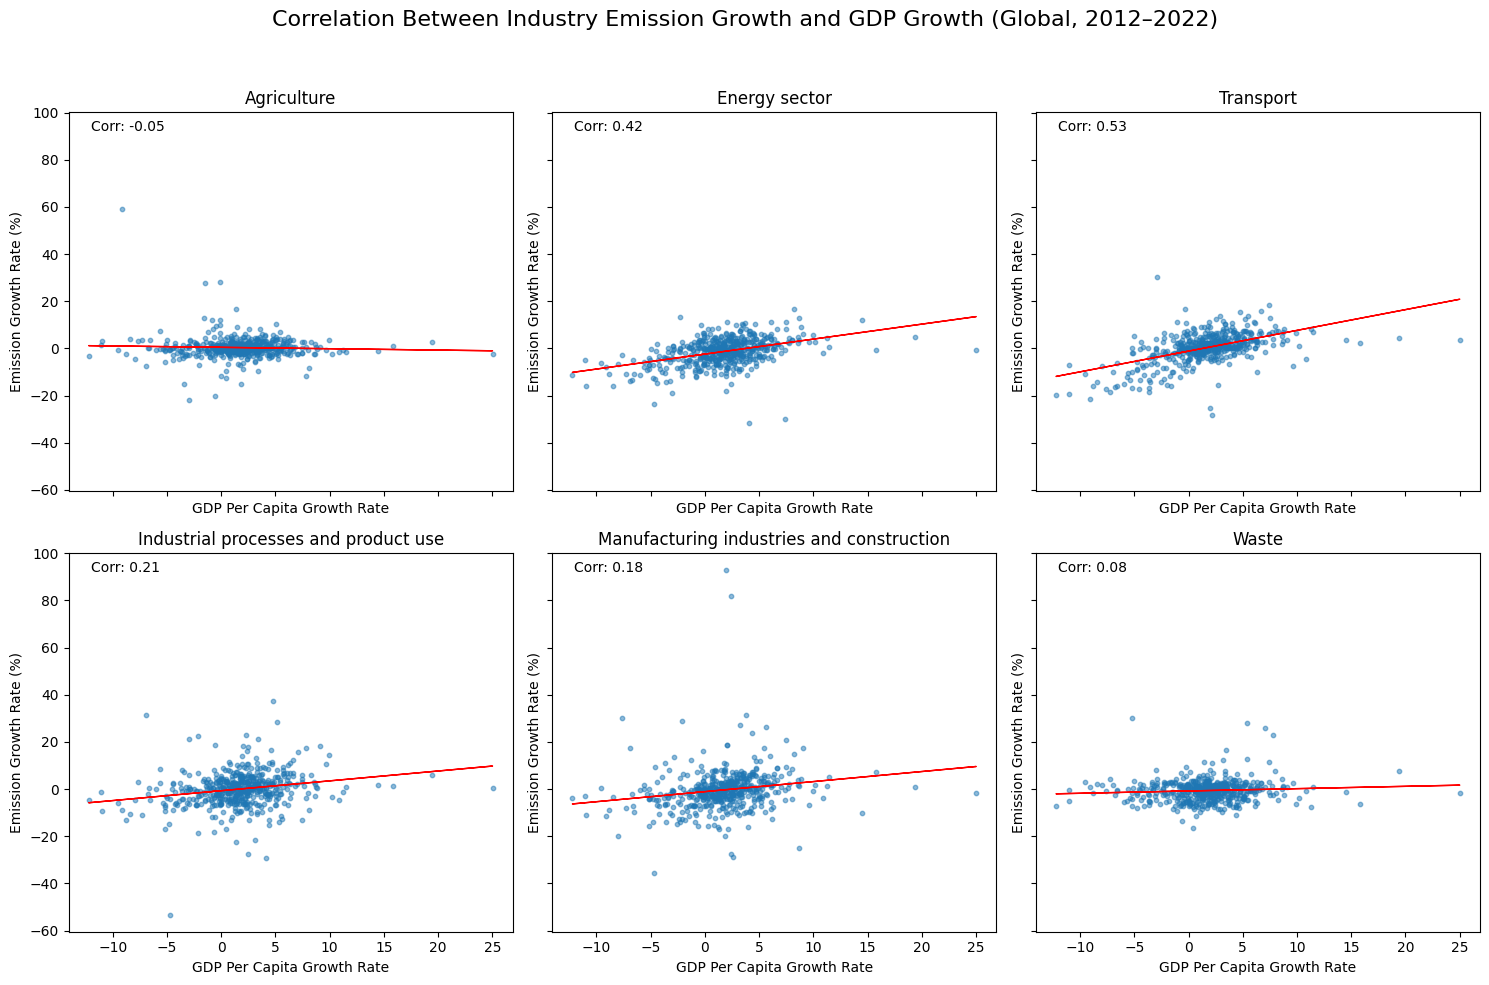

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

df = pd.read_csv("./merged_gdp_gas.csv")

# List of columns representing emission growth rates by industry
growth_columns = [
    'Agriculture_growth', 'Energy sector_growth', 'Transport_growth',
    'Industrial processes and product use_growth',
    'Manufacturing industries and construction_growth', 'Waste_growth'
]

# Create multiple subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, col in enumerate(growth_columns):
    # Drop rows with missing values
    valid_data = df[['GDP_Per_Capita_Rate', col]].dropna()
    X = valid_data['GDP_Per_Capita_Rate'].values.reshape(-1, 1)
    Y = valid_data[col].values

    # Scatter plot for each industry
    axes[i].scatter(X, Y, alpha=0.5, s=10)
    axes[i].set_title(col.replace('_growth', ''))

    # Add a regression line
    model = LinearRegression().fit(X, Y)
    axes[i].plot(X, model.predict(X), color='red', linewidth=1)

    # Calculate and display Pearson correlation coefficient
    corr, _ = pearsonr(X.flatten(), Y)
    axes[i].text(0.05, 0.95, f'Corr: {corr:.2f}', transform=axes[i].transAxes, fontsize=10)

# Set axis labels
for ax in axes:
    ax.set_xlabel('GDP Per Capita Growth Rate')
    ax.set_ylabel('Emission Growth Rate (%)')

# Add an overall title and adjust layout
plt.suptitle('Correlation Between Industry Emission Growth and GDP Growth (Global, 2012–2022)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


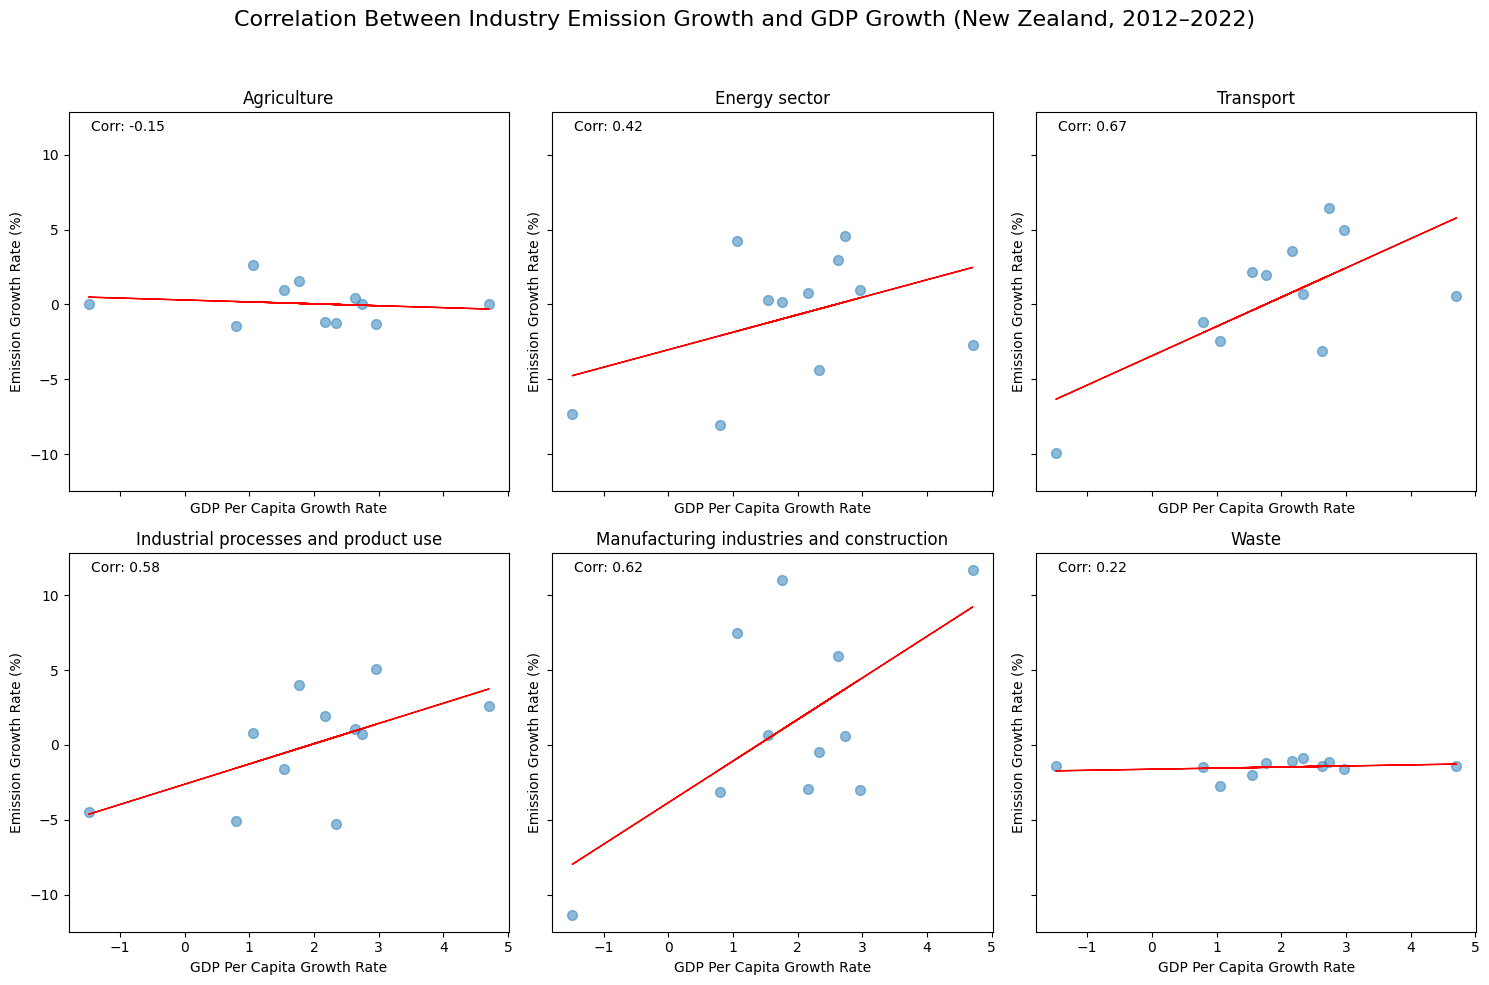

In [204]:
# Filter the dataset for New Zealand only
nz_df = df[df['Country Code'] == 'NZL']

# Create subplots (2 rows, 3 columns) with shared x and y axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Loop through each industry growth column
for i, col in enumerate(growth_columns):
    # Remove rows with missing values for the current pair of variables
    valid_data = nz_df[['GDP_Per_Capita_Rate', col]].dropna()
    X = valid_data['GDP_Per_Capita_Rate'].values.reshape(-1, 1)
    Y = valid_data[col].values

    # Scatter plot for each industry
    axes[i].scatter(X, Y, alpha=0.5, s=50)
    axes[i].set_title(col.replace('_growth', ''))

    # Fit and plot linear regression line
    model = LinearRegression().fit(X, Y)
    axes[i].plot(X, model.predict(X), color='red', linewidth=1)

    # Calculate and display Pearson correlation coefficient
    corr, _ = pearsonr(X.flatten(), Y)
    axes[i].text(0.05, 0.95, f'Corr: {corr:.2f}', transform=axes[i].transAxes, fontsize=10)

# Set labels for all subplots
for ax in axes:
    ax.set_xlabel('GDP Per Capita Growth Rate')
    ax.set_ylabel('Emission Growth Rate (%)')

# Add main title and adjust layout
plt.suptitle('Correlation Between Industry Emission Growth and GDP Growth (New Zealand, 2012–2022)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Conclusion for Question 2:
Over the past decade (2012-2022), the top three contributors to greenhouse gas emissions in New Zealand are Agriculture, the Energy sector, and Transport. Agriculture is the largest contributor (0.42 tonnes CO2-equivalent), followed by the Energy sector (0.35 tonnes CO2-equivalent) and Transport (0.13 tonnes CO2-equivalent), aligning with New Zealand’s economic reliance on agriculture.

Regarding correlation with GDP growth:
- **Energy sector** growth has a moderate positive correlation (0.42) with GDP growth, indicating that economic growth is often associated with increased energy-related emissions.
- **Agriculture** growth has a weak negative correlation (-0.15), suggesting that agricultural emissions growth does not strongly align with economic growth, possibly due to efficiency improvements or policy interventions.
- **Transport** growth has a strong positive correlation (0.67), indicating a significant association with GDP growth, likely due to increased economic activity driving transport demand.

These findings suggest that while energy and transport emissions are closely tied to economic growth, agriculture in New Zealand may be decoupling from GDP growth, potentially due to sustainable practices. Compared to global correlations (Energy 0.42, Transport 0.53, Agriculture -0.05), New Zealand’s Transport sector shows a stronger link to economic growth, while its Agriculture sector demonstrates better decoupling.

### Question 3: Sectorwise — The Relationship Between Greenhouse gas emissions and Urbanization
**How does urbanization correlate with emissions globally, and what trends emerge in New Zealand’s sectoral emissions in relation to urbanization?**

#### Steps to Answer:
1. Check correlation and regression between urbanization and different sectors globally
2. Identify countries (Top 5) who have shown relationship 
3. Identify countries (Top 5) who are major emitters in different sectors and their correlation status to understand are they same as top correlated countries
4.Identify top contributor sectors in New Zealand
5. Correlation status of New Zealand
6. Interpret the results.

Filter the Urbanization dataset to extract relevant years and `Urbanization Rate` and reshape it into a long format.

In [205]:
merged_population_gas_df2 = merged_population_gas_df.dropna(subset=['Urbanization Rate (%)'])
merged_population_gas_df2 = merged_population_gas_df2.reset_index(drop=True)
merged_df = merged_population_gas_df2

#Check missing values in merged database
print(merged_df.isna().sum())  # Should print 0 if all NaNs are replaced

Country Name                                                         0
Country Code                                                         0
Indicator Name                                                       0
Indicator Code                                                       0
Year                                                                 0
Urbanization Rate (%)                                                0
Agriculture                                                         14
Energy sector                                                        1
Industrial processes and product use                                 4
Manufacturing industries and construction                           15
Total emissions including land use, land-use change and forestry     6
Transport                                                           15
Waste                                                               14
dtype: int64


In [206]:
# Filling missing values with column means
for column in ["Agriculture", "Energy sector", "Industrial processes and product use",
               "Manufacturing industries and construction", "Transport", "Waste",
               "Total emissions including land use, land-use change and forestry"]:  
    merged_df[column].fillna(merged_df[column].mean(), inplace=True)

# Check remaining missing values
print(merged_df.isna().sum())

Country Name                                                        0
Country Code                                                        0
Indicator Name                                                      0
Indicator Code                                                      0
Year                                                                0
Urbanization Rate (%)                                               0
Agriculture                                                         0
Energy sector                                                       0
Industrial processes and product use                                0
Manufacturing industries and construction                           0
Total emissions including land use, land-use change and forestry    0
Transport                                                           0
Waste                                                               0
dtype: int64


C:\Users\86155\AppData\Local\Temp\ipykernel_137196\2428743865.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(merged_df[column].mean(), inplace=True)


In [207]:
#Check correlation between urbanization and emissions
import pandas as pd

sectors = [
    'Transport',
    'Waste',
    'Energy sector',
    'Agriculture',
    'Industrial processes and product use',
    'Manufacturing industries and construction',
    
]

for sector in sectors:
    correlation = merged_df['Urbanization Rate (%)'].corr(merged_df[sector])
    print(f"Correlation between Urbanization and {sector} emissions: {correlation:.2f}")

Correlation between Urbanization and Transport emissions: 0.07
Correlation between Urbanization and Waste emissions: 0.01
Correlation between Urbanization and Energy sector emissions: 0.01
Correlation between Urbanization and Agriculture emissions: 0.05
Correlation between Urbanization and Industrial processes and product use emissions: -0.04
Correlation between Urbanization and Manufacturing industries and construction emissions: -0.03


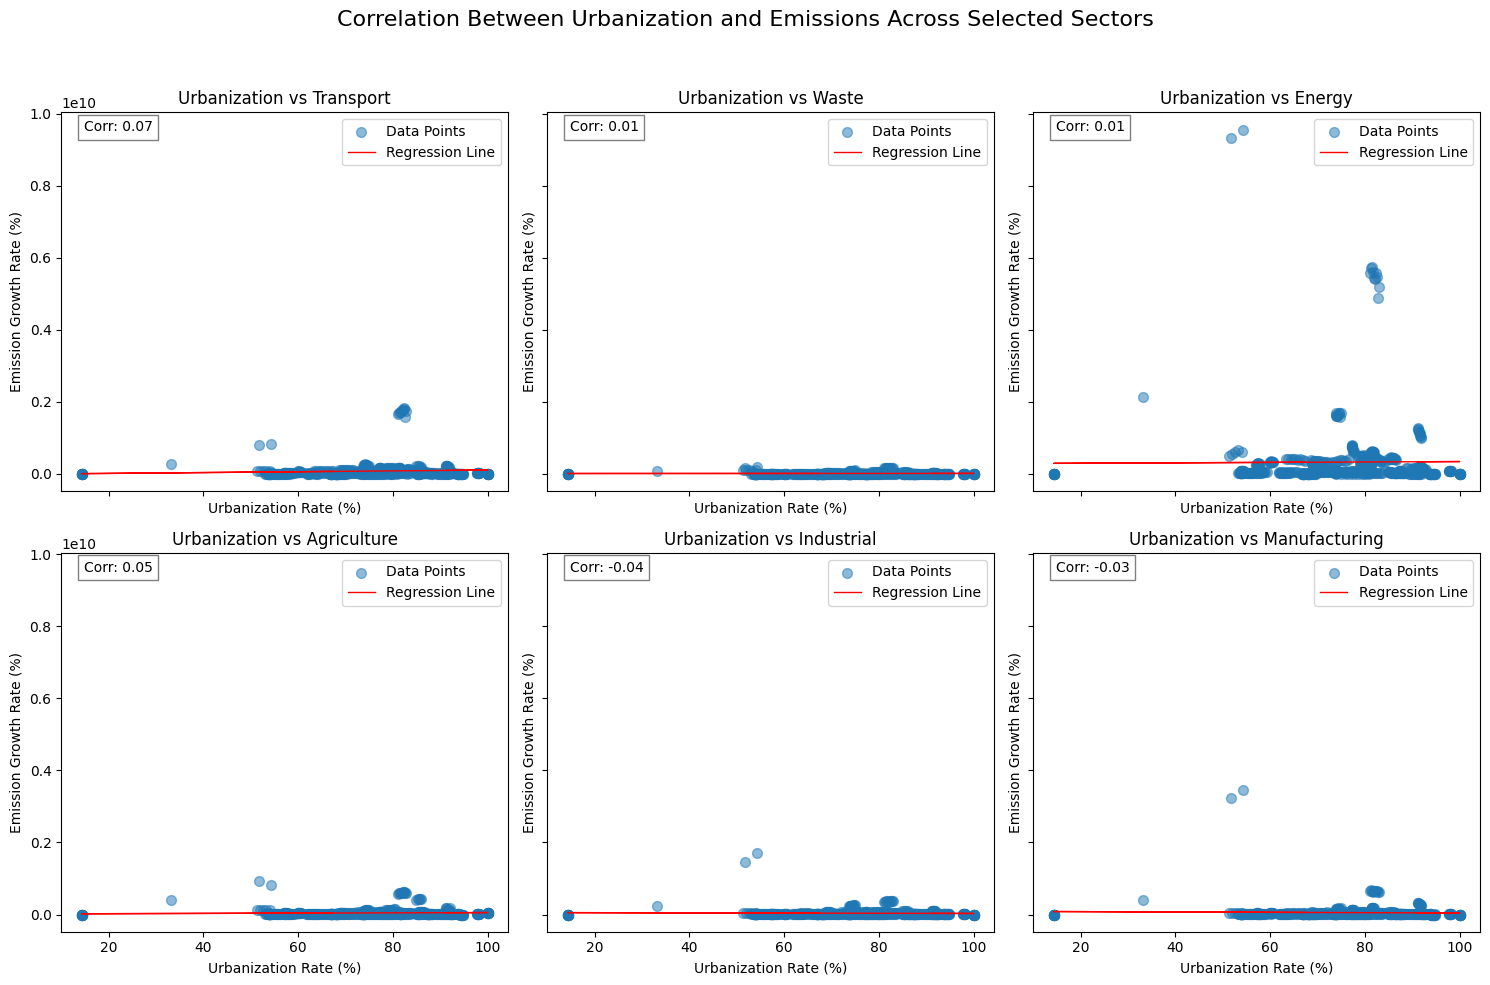

In [208]:
# Import libraries
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr

# Select the first 6 sectors only
selected_sectors = sectors[:6]  # Takes only the first six items

# Define the number of rows dynamically (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Loop through only the selected 6 sectors for visualization
for i, sector in enumerate(selected_sectors):
    valid_data = merged_df[['Urbanization Rate (%)', sector]].dropna()
    X = valid_data['Urbanization Rate (%)'].values.reshape(-1, 1)
    Y = valid_data[sector].values

    # Scatter plot
    axes[i].scatter(X, Y, alpha=0.5, s=50, label='Data Points')
    
    # Simplify chart title by removing "Emissions"
    axes[i].set_title(f'Urbanization vs {sector.split()[0]}')

    # Linear regression line
    model = LinearRegression().fit(X, Y)
    axes[i].plot(X, model.predict(X), color='red', linewidth=1, label='Regression Line')

    # Pearson correlation coefficient
    corr, _ = pearsonr(X.flatten(), Y)
    axes[i].text(0.05, 0.95, f'Corr: {corr:.2f}', transform=axes[i].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    # Set labels
    axes[i].set_xlabel('Urbanization Rate (%)')
    axes[i].set_ylabel('Emission Growth Rate (%)')
    axes[i].legend()

# Adjust layout
plt.suptitle('Correlation Between Urbanization and Emissions Across Selected Sectors', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [209]:
merged_df['Urbanization Rate (%)']

0      91.121
1      91.249
2      91.377
3      91.503
4      91.627
        ...  
552    65.341
553    65.850
554    66.355
555    66.856
556    67.354
Name: Urbanization Rate (%), Length: 557, dtype: float64

In [210]:
#Check regression to know how much emissions rise per 1% increase in urbanization.
import statsmodels.api as sm

X = sm.add_constant(merged_df['Urbanization Rate (%)'])

for sector in sectors:
    y = merged_df[sector]
    model = sm.OLS(y, X).fit()
    print(f"\nRegression results for {sector}")
    print(model.summary())



Regression results for Transport
                            OLS Regression Results                            
Dep. Variable:              Transport   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.012
Date:                Wed, 04 Jun 2025   Prob (F-statistic):             0.0832
Time:                        23:41:56   Log-Likelihood:                -11526.
No. Observations:                 557   AIC:                         2.306e+04
Df Residuals:                     555   BIC:                         2.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [211]:
# Since we found positive relationship in Transport and Agriculture hence 
# Identify countries who have positive correlation in Transport and Agriculture
##Group and Calculate Country-wise Correlation Globally top 5 countries

import pandas as pd

# Ensure the dataset includes necessary columns and drop missing values
subset = merged_df[['Country Name', 'Year', 'Urbanization Rate (%)', 'Transport', 'Agriculture']].dropna()

# Compute correlation for Urbanization-Transport
country_corr_transport = (
    subset.groupby('Country Name')
    .apply(lambda group: group['Urbanization Rate (%)'].corr(group['Transport']))
    .reset_index(name='Urbanization-Transport Correlation')
)

# Compute correlation for Urbanization-Agriculture
country_corr_agriculture = (
    subset.groupby('Country Name')
    .apply(lambda group: group['Urbanization Rate (%)'].corr(group['Agriculture']))
    .reset_index(name='Urbanization-Agriculture Correlation')
)

# Sort correlation values to get the top 5 strongest correlations
top_corr_transport = country_corr_transport.dropna().sort_values(by='Urbanization-Transport Correlation', ascending=False).head(5)
top_corr_agriculture = country_corr_agriculture.dropna().sort_values(by='Urbanization-Agriculture Correlation', ascending=False).head(5)

# Display correlation results
print("\nTop 5 Countries: Urbanization vs Transport Emissions\n", top_corr_transport)
print("\nTop 5 Countries: Urbanization vs Agriculture Emissions\n", top_corr_agriculture)


Top 5 Countries: Urbanization vs Transport Emissions
    Country Name  Urbanization-Transport Correlation
9         China                            1.000000
41         Peru                            0.985444
10     Colombia                            0.965038
53      Turkiye                            0.903544
21      Hungary                            0.888274

Top 5 Countries: Urbanization vs Agriculture Emissions
           Country Name  Urbanization-Agriculture Correlation
46        Saudi Arabia                              1.000000
29          Kazakhstan                              0.993827
5               Brazil                              0.985689
45  Russian Federation                              0.977031
53             Turkiye                              0.971016


d:\Software\python\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\Software\python\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
d:\Software\python\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
d:\Software\python\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Software\python\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\86155\AppData\Local\Temp\ipykernel_137196\3706279362.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the g

C:\Users\86155\AppData\Local\Temp\ipykernel_137196\4205527303.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_corr_transport, x='Urbanization-Transport Correlation', y='Country Name', palette='coolwarm', ax=axes[0])
C:\Users\86155\AppData\Local\Temp\ipykernel_137196\4205527303.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_corr_agriculture, x='Urbanization-Agriculture Correlation', y='Country Name', palette='viridis', ax=axes[1])


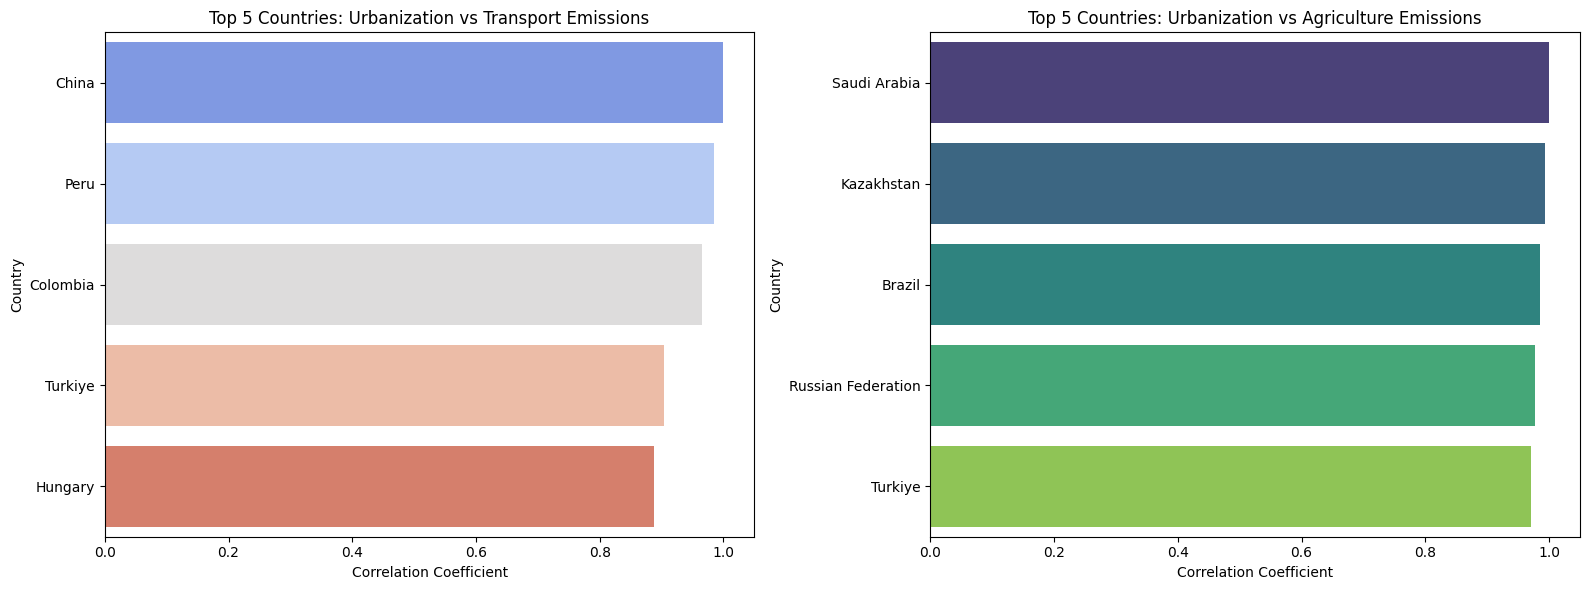

In [212]:
# Visualization  of Group and Calculate Country-wise Correlation Globally top 5 countries

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for Urbanization-Transport correlation
sns.barplot(data=top_corr_transport, x='Urbanization-Transport Correlation', y='Country Name', palette='coolwarm', ax=axes[0])
axes[0].set_title('Top 5 Countries: Urbanization vs Transport Emissions')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_ylabel('Country')

# Bar chart for Urbanization-Agriculture correlation
sns.barplot(data=top_corr_agriculture, x='Urbanization-Agriculture Correlation', y='Country Name', palette='viridis', ax=axes[1])
axes[1].set_title('Top 5 Countries: Urbanization vs Agriculture Emissions')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_ylabel('Country')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [213]:
#Aggregate Sector Emissions by Country
# List of emission sectors
sectors_Updated = [
    'Transport', 
    'Agriculture' 
]

# Sum emissions per sector for each country
country_emissions = (
    merged_df.groupby('Country Name')[sectors_Updated]
    .sum()
    .reset_index()
)

In [214]:
# Who are global top emitter in selected sectors (Top 5 Countries) 
# to compare with thouse countriess who have positive elationship in Transport and Agriculture identified in previous step.

top_5_by_sector = {}

for sector in sectors_Updated:
    top_5 = country_emissions.nlargest(5, sector)[['Country Name', sector]]
    top_5_by_sector[sector] = top_5
    print(f"\n🔹 Top 5 Countries by Emissions in {sector}:\n", top_5)


🔹 Top 5 Countries by Emissions in Transport:
           Country Name     Transport
56       United States  1.729216e+10
45  Russian Federation  2.429159e+09
28               Japan  2.034979e+09
19             Germany  1.730655e+09
9                China  1.624992e+09

🔹 Top 5 Countries by Emissions in Agriculture:
           Country Name   Agriculture
56       United States  6.032270e+09
5               Brazil  2.130381e+09
9                China  1.767701e+09
0            Argentina  1.316906e+09
45  Russian Federation  1.137422e+09


C:\Users\86155\AppData\Local\Temp\ipykernel_137196\3725537003.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x=sector, y='Country Name', palette='coolwarm', ax=axes[i])
C:\Users\86155\AppData\Local\Temp\ipykernel_137196\3725537003.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x=sector, y='Country Name', palette='coolwarm', ax=axes[i])


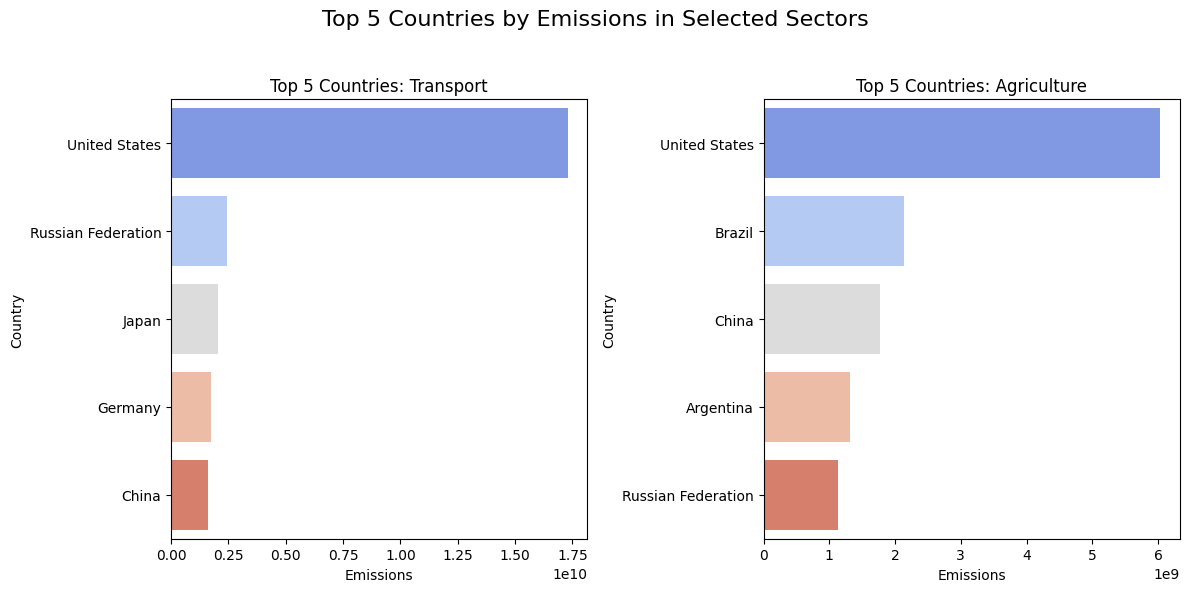

In [215]:
# Visualizaton of global top emitter in selected sectors (Top 5 Countries)
import matplotlib.pyplot as plt
import seaborn as sns

# Use the updated sector list
selected_sectors = sectors_Updated  # Updated sector list from another chunk

# Create a figure with 1 row and 2 columns for two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Loop through the selected sectors to create bar charts
for i, sector in enumerate(selected_sectors):
    # Select top 5 countries for the current sector
    top_5 = country_emissions.nlargest(5, sector)[['Country Name', sector]]

    # Bar chart visualization
    sns.barplot(data=top_5, x=sector, y='Country Name', palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Top 5 Countries: {sector}')
    axes[i].set_xlabel('Emissions')
    axes[i].set_ylabel('Country')

# Adjust layout for clarity
plt.suptitle('Top 5 Countries by Emissions in Selected Sectors', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [216]:
# Correlation status of global top emitter in selected sectors (Top 5 Countries)
import pandas as pd

# Dictionary to store correlation results
top_5_corr_by_sector = {}

for sector in sectors_Updated:  # Loop through sectors_Updated instead of sectors
    # Get top 5 emitting countries for the sector
    top_5 = country_emissions.nlargest(5, sector)[['Country Name', sector]]  # Use sector instead of sectors_Updated

    # Filter the original dataset for these top 5 countries
    top_5_data = merged_df[merged_df['Country Name'].isin(top_5['Country Name'])]

    # Calculate correlation for each of these countries
    country_corr = (
        top_5_data.groupby('Country Name')
        .apply(lambda group: group['Urbanization Rate (%)'].corr(group[sector]))  # Use sector instead of sectors_Updated
        .reset_index(name=f'Urbanization-{sector} Correlation')  # Use sector for naming
    )

    # Store the correlation results
    top_5_corr_by_sector[sector] = country_corr

    # Print the correlation for the top 5 countries in the sector
    print(f"\nUrbanization Correlation for Top 5 Countries in {sector}:\n", country_corr)


Urbanization Correlation for Top 5 Countries in Transport:
          Country Name  Urbanization-Transport Correlation
0               China                            1.000000
1             Germany                           -0.532740
2               Japan                           -0.918493
3  Russian Federation                           -0.439031
4       United States                            0.200328

Urbanization Correlation for Top 5 Countries in Agriculture:
          Country Name  Urbanization-Agriculture Correlation
0           Argentina                             -0.520605
1              Brazil                              0.985689
2               China                             -1.000000
3  Russian Federation                              0.977031
4       United States                              0.443909


C:\Users\86155\AppData\Local\Temp\ipykernel_137196\1881292670.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group['Urbanization Rate (%)'].corr(group[sector]))  # Use sector instead of sectors_Updated
C:\Users\86155\AppData\Local\Temp\ipykernel_137196\1881292670.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group['Urbanization Rate (%)'].corr(group[sec

In [217]:
#Identify top contributing sectors in New Zealand

import pandas as pd

# Filter merged_df for New Zealand only
nz_data = merged_df[merged_df['Country Name'] == 'New Zealand']

# Select relevant columns for emissions in New Zealand
nz_emissions = nz_data[['Year', 'Transport', 'Waste', 'Energy sector', 
                        'Agriculture', 'Industrial processes and product use', 
                        'Manufacturing industries and construction']]

# Calculate total emissions per sector (sum over all years)
sector_totals = nz_emissions.drop(columns=['Year']).sum().reset_index()
sector_totals.columns = ['Sector', 'Total Emissions']

# Sort total emissions in descending order
sector_totals = sector_totals.sort_values(by='Total Emissions', ascending=False)

# Display sorted emissions per sector
print("\nTotal Emissions by Sector in New Zealand (Descending Order):\n", sector_totals)


Total Emissions by Sector in New Zealand (Descending Order):
                                       Sector  Total Emissions
3                                Agriculture     4.682104e+08
2                              Energy sector     3.492128e+08
0                                  Transport     1.523604e+08
5  Manufacturing industries and construction     7.278250e+07
4       Industrial processes and product use     5.138196e+07
1                                      Waste     4.130299e+07


In [218]:
#Relationship of New Zealand
import pandas as pd

# Filter data for New Zealand
nz_data = merged_df[merged_df['Country Name'] == 'New Zealand']

# List of emission sectors to analyze
sectors = ['Transport', 'Waste', 'Energy sector', 'Agriculture', 
           'Industrial processes and product use', 'Manufacturing industries and construction']

# Calculate correlation between Urbanization Rate and each sector
nz_corr = {sector: nz_data['Urbanization Rate (%)'].corr(nz_data[sector]) for sector in sectors}

# Convert results to DataFrame for better readability
nz_corr_df = pd.DataFrame(list(nz_corr.items()), columns=['Sector', 'Urbanization Correlation'])

# Display results
print("\nCorrelation Between Urbanization and Emissions in New Zealand:\n", nz_corr_df)


Correlation Between Urbanization and Emissions in New Zealand:
                                       Sector  Urbanization Correlation
0                                  Transport                  0.314825
1                                      Waste                 -0.998200
2                              Energy sector                 -0.608650
3                                Agriculture                 -0.481075
4       Industrial processes and product use                 -0.418520
5  Manufacturing industries and construction                 -0.002639


C:\Users\86155\AppData\Local\Temp\ipykernel_137196\1277394812.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nz_corr_df, x='Urbanization Correlation', y='Sector', palette='coolwarm')


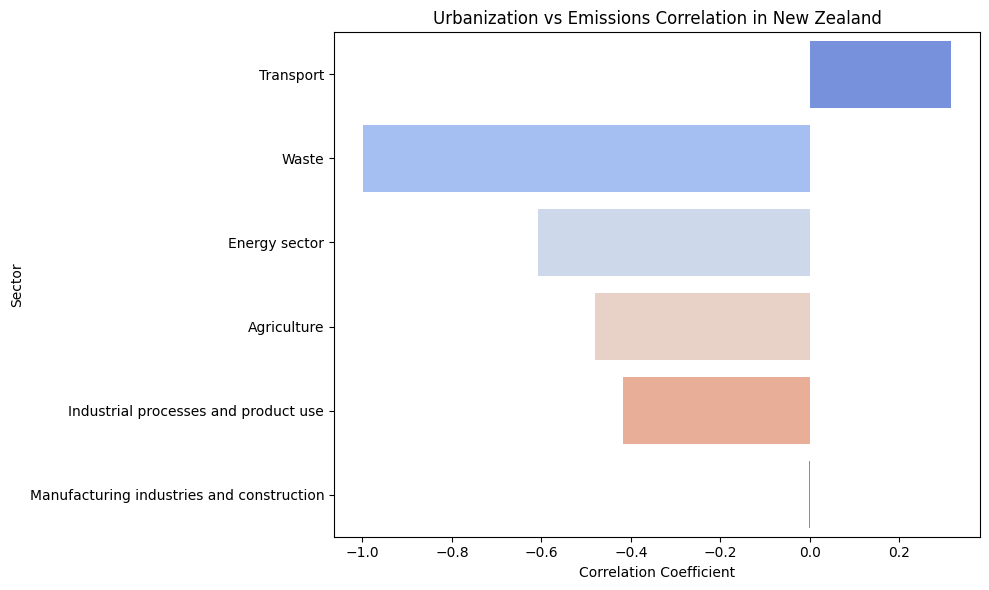

In [219]:
# To visualize the relationship across sectors
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar chart for sector-wise correlation
plt.figure(figsize=(10, 6))
sns.barplot(data=nz_corr_df, x='Urbanization Correlation', y='Sector', palette='coolwarm')

plt.title('Urbanization vs Emissions Correlation in New Zealand')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

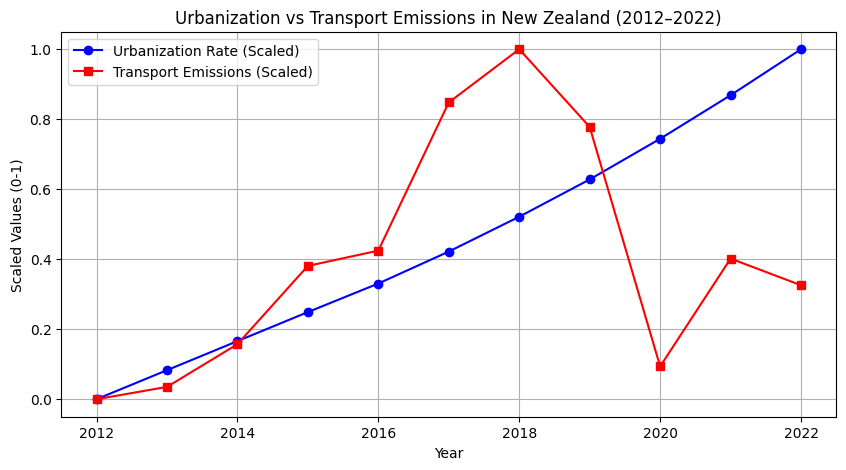

In [220]:
#Scaling since urbanization rate(as a percentage of total population) and  my gas data unit of measure is Kilogrammes of CO2-equivalent per person, Thousands.

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Selecting relevant columns
nz_data_scaled = nz_data[['Year', 'Urbanization Rate (%)', 'Transport']].copy()

# Apply Min-Max Scaling
scaler = MinMaxScaler()
nz_data_scaled[['Urbanization Rate (%)', 'Transport']] = scaler.fit_transform(nz_data_scaled[['Urbanization Rate (%)', 'Transport']])

# Plot scaled values over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(nz_data_scaled['Year'], nz_data_scaled['Urbanization Rate (%)'], label='Urbanization Rate (Scaled)', color='blue', marker='o')
plt.plot(nz_data_scaled['Year'], nz_data_scaled['Transport'], label='Transport Emissions (Scaled)', color='red', marker='s')

# Formatting
plt.title('Urbanization vs Transport Emissions in New Zealand (2012–2022)')
plt.xlabel('Year')
plt.ylabel('Scaled Values (0-1)')
plt.legend()
plt.grid(True)
plt.show()

#### Conclusion for Question 3:
Globally, urbanization is not a strong predictor of emissions. **Transport** and **Agriculture** have weak correlations, but the relationships are not statistically robust. Countries with strong urbanization-emission correlations are not the largest emitters, indicating that urban growth does not directly drive emission volume.

In New Zealand, emissions are driven primarily by **Agriculture**, not **urbanization**. **Transport** is the only sector showing a positive urbanization-emission link. 

Overall, These findings indicates that,  Global climate and emission reduction strategies should not assume urbanization as a key lever. Instead, they should focus on: Energy transition (e.g., renewables adoption), Industrial decarbonization, Transport electrification and Agricultural reforms and land use management

### Question 4

Which countries have a lower Pearson correlation coefficient between transport-related CO₂ emissions and GDP growth compared to New Zealand, and what transport sector policies in these countries could inform New Zealand’s efforts to reduce the linkage between transport emissions and GDP growth?

### Limitation of the Combined Dataset

The combined dataset (`merged_gdp_gas_population.csv`) provides comprehensive data on GDP per capita, greenhouse gas emissions by sector (including transport), population, and per capita CO₂ emissions for multiple countries from 2012 to 2022. This dataset enables the calculation of the Pearson correlation coefficient between transport-related CO₂ emissions and GDP growth for New Zealand and other countries, as well as comparisons with the global average. However, it lacks information on specific transport sector policies implemented by countries, which is essential to identify actionable strategies that New Zealand could adopt to weaken the linkage between transport emissions and GDP growth. To address this limitation, additional data on transport-related climate policies must be sourced, ideally through web scraping from reliable policy databases or government websites.

### Web Scraping Solution

To answer the fourth question, we scraped transport-related policy data from the [Climate Policy Database](https://climatepolicydatabase.org/policies) . This source provides detailed information on climate policies, including those targeting the transport sector, across various countries. Below, we describe the dataset’s origin, characteristics, and scraping process, followed by a sample of crawled data and an explanation of how it can be used to answer the question.

#### Dataset Origin

- **Source**: [Climate Policy Database](https://climatepolicydatabase.org/policies)  
- **Access**: Database is publicly accessible. Data will be extracted using a custom Python web scraper built with the `requests` and `BeautifulSoup` libraries.  
- **Method**: The scraper will target policy listings filtered by the transport sector, extracting fields such as policy name, sector, policy type, country, and decision date. 

#### Dataset Characteristics

- **Format**: CSV  
- **Structure**: Tabular data with 5 columns:  
  - `Policy name`: Name of the policy (e.g., "CO2 Tax on Transport").  
  - `Sector`: Sector(s) targeted, focusing on "Transport" or related (e.g., "Transport, Low-emissions mobility").  
  - `Policy type`: Type of policy (e.g., "Energy efficiency", "Renewables", "Other low-carbon technologies").  
  - `Country`: Country implementing the policy (e.g., "Sweden").  
  - `Decision date`: Year the policy was enacted (e.g., 2015).

- **Records**: The dataset is expected to contain approximately 300–400 records, covering transport-related policies from developed countries (e.g., Sweden, Germany, Netherlands) from 2010 to 2024.  
- **Initial Audit**:  
  - The data are expected to be structured, but multi-valued sector fields (e.g., "Transport, Electricity and heat") may require splitting.  
  - Missing decision dates or incomplete policy descriptions could occur, necessitating cleaning or imputation.  
  - The dataset may not capture all transport policies (e.g., local incentives not listed in global databases), requiring cross-verification with national government websites.

#### How the Crawled Data Can Be Used to Answer the Fourth Question

To answer the question, “Which countries have a lower Pearson correlation coefficient between transport-related CO₂ emissions and GDP growth compared to New Zealand, and what transport sector policies in these countries could inform New Zealand’s efforts to reduce the linkage between transport emissions and GDP growth?”, the crawled transport policy dataset can be combined with `merged_gdp_gas_population.csv` as follows:  

1. **Calculate Correlations**: Use `merged_gdp_gas_population.csv` to compute the Pearson correlation coefficient between transport CO₂ emissions (`Transport` column) and GDP growth (`GDP_Per_Capita_Rate`) for New Zealand and other developed countries (e.g., OECD members) from 2012 to 2022.  
   - Example: New Zealand’s correlation for the transport sector is 0.67, while the global average is 0.53. So, identify developed countries whose transport sector correlation is below 0.53.
2. **Filter Transport Policies**: Use the crawled dataset (`transport_policies.csv`) to extract transport-related policies for countries with lower correlations. Focus on policies promoting low-carbon transport (e.g., CO2 taxes, electric vehicle incentives, public transport investments).  
3. **Evaluate Policy Relevance**: Analyze the decision dates of transport-related policies, focusing on those introduced between 2010 and 2024. Then, compare these timelines with the transport emissions trends in the `merged_gdp_gas_population.csv` dataset for the previously identified low-correlation countries. Pay particular attention to countries where transport emissions declined or growth slowed after a specific policy was implemented. For example, if Sweden’s transport emissions growth slowed after 2015, this may indicate the effectiveness of its CO₂ tax policy. Assess whether policies such as electric vehicle subsidies, urban transport planning, or public transit investments have shown success in other countries, and evaluate their relevance and adaptability to New Zealand’s context. 
4. **Synthesize Recommendations**: Recommend policies for New Zealand based on successful strategies in low-correlation countries. For example, adopting a transport CO2 tax (like Sweden) or investing in hydrogen infrastructure (like France) could reduce New Zealand’s transport emissions-GDP linkage.  

**Challenges**:  

- The crawled dataset may miss some transport policies (e.g., local initiatives not in global databases). Scraping national transport ministry websites (e.g., Sweden’s [Transport Agency](https://www.trafikverket.se/)) could provide more granular data.  
- Quantitative policy impact analysis requires additional data (e.g., policy enforcement details, investment levels), which may need further scraping or external sources. 

#### Web Scraping Process

The transport policy dataset will be created using a Python script with `requests` and `BeautifulSoup`. Below is a sample code snippet for scraping the Climate Policy Database.

**Step 1:** Open the search page, analyze the HTML code to extract the mapping between country names and country codes, and store it in a dictionary. The country list HTML sample code:
```html
<select id="edit-country--2" name="country[]">
   <option value="354">Albania</option>
   <option value="355">Algeria</option>
   <option value="537">American Samoa</option>
   ...
</select>
```

In [221]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import ssl
import urllib

developed_countries_iso3 = {
    "AUS": "Australia",
    "AUT": "Austria",
    "BEL": "Belgium",
    "CAN": "Canada",
    "CHL": "Chile",
    "CZE": "Czech Republic",
    "DNK": "Denmark",
    "EST": "Estonia",
    "FIN": "Finland",
    "FRA": "France",
    "DEU": "Germany",
    "GRC": "Greece",
    "HUN": "Hungary",
    "ISL": "Iceland",
    "IRL": "Ireland",
    "ISR": "Israel",
    "ITA": "Italy",
    "JPN": "Japan",
    "KOR": "South Korea",
    "LVA": "Latvia",
    "LTU": "Lithuania",
    "LUX": "Luxembourg",
    "NLD": "Netherlands",
    "NZL": "New Zealand",
    "NOR": "Norway",
    "POL": "Poland",
    "PRT": "Portugal",
    "SVK": "Slovak Republic",
    "SVN": "Slovenia",
    "ESP": "Spain",
    "SWE": "Sweden",
    "CHE": "Switzerland",
    "GBR": "United Kingdom",
    "USA": "United States of America"
}

params = {"country[]": "", "decision_date": "", "high_impact": "All", "sector[937]": 937, "keywords": ""}
query_string = urllib.parse.urlencode(params)
# Specify the url
url = "https://climatepolicydatabase.org/policies?" + query_string
print(url)
# Package the request and send the request and catches the response
req = Request(url)
response = urlopen(req, context=ssl._create_unverified_context())

# Get the content of the response
resp_body = response.read()
print(resp_body)

# Be polite and close the response!
response.close()

soup = BeautifulSoup(resp_body, 'lxml')  # Using lxml as parser
 
# find a select tag(id = 'edit-country--2')
selects = soup.find(id = 'edit-country--2')

options = selects.find_all('option')  # Find all <option> tags

#define an empty dictionary
dicCountry = {}
for option in options:
    dicCountry[option.text] = option['value']

https://climatepolicydatabase.org/policies?country%5B%5D=&decision_date=&high_impact=All&sector%5B937%5D=937&keywords=
b'<!DOCTYPE html>\n<html lang="en" dir="ltr">\n  <head>\n    <meta charset="utf-8" />\n<noscript><style>form.antibot * :not(.antibot-message) { display: none !important; }</style>\n</noscript><script async src="https://www.googletagmanager.com/gtag/js?id=G-4RZ3V93XLT"></script>\n<script>window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments)};gtag("js", new Date());gtag("set", "developer_id.dMDhkMT", true);gtag("config", "G-4RZ3V93XLT", {"groups":"default","page_placeholder":"PLACEHOLDER_page_location","allow_ad_personalization_signals":false});gtag("config", "UA-188836649-1", {"groups":"default","anonymize_ip":true,"page_placeholder":"PLACEHOLDER_page_path","allow_ad_personalization_signals":false});</script>\n<meta name="Generator" content="Drupal 10 (https://www.drupal.org)" />\n<meta name="MobileOptimized" content="width" />\n<meta name=

**Step 2:** Based on the list of developed countries, construct the URLs to be scraped (including the parameters: country, sector, and year), extract the list of policy documents from the returned HTML code, and store them in a DataFrame. Finally, export all results to a CSV file.

In [222]:
import pandas as pd

def getParam(countryName, year):
    get_params = {"country[]": "", "decision_date": "", "high_impact": "All", "sector[937]": 937, "keywords": ""}
    if (dicCountry[countryName] != None):
        get_params["country[]"] = dicCountry[countryName]
        get_params["decision_date"] = year
        return urllib.parse.urlencode(get_params)
    else:
        None

def getTable(url):
    # Package the request and send the request and catches the response
    req = Request(url)
    response = urlopen(req, context=ssl._create_unverified_context())

    # Get the content of the response
    resp_body = response.read()
    response.close()
    print(url)

    soup2 = BeautifulSoup(resp_body, 'lxml')
    table_div = soup2.find('div', {'class' : 'listing__content'})
    table = table_div.find('table')
    if table is None:
        return pd.DataFrame()

    # extract the data of table
    rows = table.find_all('tr')  # search all rows
    table_data = []
    for row in rows:
        cols = row.find_all(['td', 'th'])  # Search for all cells in the row, including <td> and <th> elements.
        cols = [col.text.strip() for col in cols]  # Extract the text and strip leading and trailing whitespace.
        table_data.append(cols)

    response.close()

    list = []
    if (len(table_data) > 1):
        header = table_data[0]
        for i in range(1, len(table_data)):
            item = {}
            for j in range(0, len(header)):
                item[header[j]] = table_data[i][j].replace('\n\n\n', ',')
            list.append(item)
    df = pd.DataFrame(list)

    return df

dfPolicy = pd.DataFrame()

for CountryName in developed_countries_iso3.values():
    if CountryName in dicCountry:
        for year in range(2010, 2025):
            param_String = getParam(CountryName, year)
            if param_String is not None:
                url = "https://climatepolicydatabase.org/policies?" +  param_String
                policy = getTable(url)
                dfPolicy = pd.concat([dfPolicy, policy], ignore_index=True)

dfPolicy.to_csv("transport_all_country.csv", index=False)

https://climatepolicydatabase.org/policies?country%5B%5D=365&decision_date=2010&high_impact=All&sector%5B937%5D=937&keywords=
https://climatepolicydatabase.org/policies?country%5B%5D=365&decision_date=2011&high_impact=All&sector%5B937%5D=937&keywords=
https://climatepolicydatabase.org/policies?country%5B%5D=365&decision_date=2012&high_impact=All&sector%5B937%5D=937&keywords=
https://climatepolicydatabase.org/policies?country%5B%5D=365&decision_date=2013&high_impact=All&sector%5B937%5D=937&keywords=
https://climatepolicydatabase.org/policies?country%5B%5D=365&decision_date=2014&high_impact=All&sector%5B937%5D=937&keywords=
https://climatepolicydatabase.org/policies?country%5B%5D=365&decision_date=2015&high_impact=All&sector%5B937%5D=937&keywords=
https://climatepolicydatabase.org/policies?country%5B%5D=365&decision_date=2016&high_impact=All&sector%5B937%5D=937&keywords=
https://climatepolicydatabase.org/policies?country%5B%5D=365&decision_date=2017&high_impact=All&sector%5B937%5D=937&ke

KeyboardInterrupt: 

**Sample Crawled Data**

| Policy name                                                  | Sector                                                       | Policy type                                                  | Country   | Decision date |
| ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | --------- | ------------- |
| National Strategy on Energy efficiency                       | Industry,Transport,Buildings,Electricity and heat            | Energy efficiency                                            | Australia | 2010          |
| Emerging Renewables Program                                  | Electricity and heat,Transport                               | Renewables                                                   | Australia | 2011          |
| Renewable Energy Agency (ARENA)                              | Electricity and heat,Transport                               | Renewables                                                   | Australia | 2012          |
| Clean Energy Future Plan                                     | General,Buildings,Electricity and heat,Industry,Transport    | Energy service demand reduction and resource efficiency,Energy efficiency,Renewables,Other low-carbon technologies and fuel switch,Non-energy use | Australia | 2012          |
| Emissions standards for light-duty vehicles                  | Transport,Light-duty vehicles                                | Energy efficiency                                            | Australia | 2012          |
| Fuel Quality Information Standard (Ethanol E85) Determination | Transport                                                    | Energy efficiency,Renewables                                 | Australia | 2012          |
| Fuel Standard (Ethanol E85) Determination                    | Transport                                                    | Energy efficiency,Renewables                                 | Australia | 2012          |
| Greenhouse and Energy Minimum Standards Act                  | Industry,Buildings,Transport,Electricity and heat,Appliances | Energy efficiency,Non-energy use                             | Australia | 2012          |
| Carbon Pricing Mechanism                                     | Industry,Transport,Electricity and heat                      | Energy service demand reduction and resource efficiency,Energy efficiency,Renewables,Other low-carbon technologies and fuel switch,Non-energy use | Australia | 2012          |
| Emissions Reduction Fund                                     | Industry,Transport,Buildings,Electricity and heat,Agriculture and forestry,Agricultural CH4,Agricultural CO2,Agricultural N2O,Forestry | Energy service demand reduction and resource efficiency,Energy efficiency,Other low-carbon technologies and fuel switch,Non-energy use,Renewables | Australia | 2014          |

## Key Takeaways

- New Zealand shows partial decoupling between GDP growth and emissions compared to global averages.
- Transport and energy sectors remain the strongest contributors to emissions growth.
- Urbanization alone does not explain high emission levels.
- Policy-focused interventions are required, particularly in transport emissions, to sustain low-emission growth.

**Practical relevance:**  
These insights support evidence-based sustainability planning and benchmarking for New Zealand and comparable economies.
